# 1. Business Understanding

# Business objective

The goal is to predict customer churn in the telecommunications industry.
Key objectives:
1. Identify which customers are likely to churn.
2. Understand the key drivers of churn.
3. Use insights to develop customer retention strategies.




#### **Business Objective 1**: Identify which customers are likely to churn.
**Data Science Objective**:
- Develop a predictive model to classify customers as likely to churn or not.
- Use supervised machine learning techniques (e.g., Logistic Regression, Random Forest, Gradient Boosting) for binary classification.

---


#### **Business Objective 2**: Understand the key drivers of churn.
**Data Science Objective**:
- Perform feature importance analysis to identify variables strongly correlated with churn.
- Use SHAP (SHapley Additive exPlanations) or other explainable AI (XAI) methods to interpret the model.
- Investigate interaction effects between features using SHAP interaction values or correlation analysis.

---


#### **Business Objective 3**: Use insights to develop customer retention strategies.
**Data Science Objective**:
- Segment customers based on churn risk and feature patterns (e.g., using clustering or decision trees).
- Identify actionable patterns (e.g., high churn for customers with short tenure and high charges).
- Generate retention strategy recommendations based on model predictions and feature analysis (e.g., offer discounts to high-risk customers or improve customer support).



#2. Data Understanding

## Data Loading

In [ ]:

import pandas as pd

try:
    df1 = pd.read_csv('churn-bigml-80.csv')
    print("File 1 Description:")
    print(df1)
    print("\n")

    df2 = pd.read_csv('churn-bigml-20.csv')
    print("File 2 Description:")
    print(df2)

except FileNotFoundError:
    print("One or both of the files were not found. Please ensure the files exist in the correct location and have the correct names.")
except pd.errors.EmptyDataError:
    print("One or both of the files are empty.")
except pd.errors.ParserError:
    print("Error parsing the CSV file(s). Please ensure the file(s) are valid CSV format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File 1 Description:
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \


In [ ]:
try:
    df = pd.concat([df1, df2], ignore_index=True)
    print("Merged Dataset:")
    print(df)
except NameError:
    print("The dataframes df1 and/or df2 are not defined. Please ensure the previous code to load the dataframes has been executed successfully.")
except Exception as e:
    print(f"An error occurred during merging: {e}")

Merged Dataset:
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0   

* Our dataset consists of 20 columns and 3333 rows, detailing customer information. It includes columns describing the customer's region, their service plans (such as international or voicemail plans), total call minutes, total number of calls, and whether the customer contacted customer service.

## Data Description

In [ ]:

try:
    # Assuming df is defined from the previous code block
    print(df.info())
except NameError:
    print("The dataframe 'df' is not defined. Please ensure the previous code to load and merge the dataframes has been executed successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.describe().T

count        mean        std     min     25%     50%  \
Account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
Area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
Number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
Total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
Total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
Total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
Total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
Total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
Total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
Total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
Total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
Total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
Total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
Total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
Total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
Customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
Account length          127.00  243.00  
Area code               510.00  510.00  
Number vmail messages    20.00   51.00  
Total day minutes       216.40  350.80  
Total day calls         114.00  165.00  
Total day charge         36.79   59.64  
Total eve minutes       235.30  363.70  
Total eve calls         114.00  170.00  
Total eve charge         20.00   30.91  
Total night minutes     235.30  395.00  
Total night calls       113.00  175.00  
Total night charge       10.59   17.77  
Total intl minutes       12.10   20.00  
Total intl calls          6.00   20.00  
Total intl charge         3.27    5.40  
Customer service calls    2.00    9.00

*   High Variability in Usage:
Daytime usage shows the most variation, which might correlate with customer segmentation (e.g., heavy vs. light users).
*   Voicemail Services:
A majority do not use voicemail, suggesting it is either underutilized or unnecessary for many customers.
*   Customer Service:
Most customers have minimal interactions with customer service, but outliers with frequent calls may represent potential churn risks.
*   International Plans:
Low international call usage indicates limited demand, making it a less critical feature for most customers.
*   Charges:Charges align closely with usage, with night charges being the most cost-efficient.




Data Distribution : In this part we are trying to visualize the distribution of the data . Try to identify any special pattern in the data


## Data Exploration

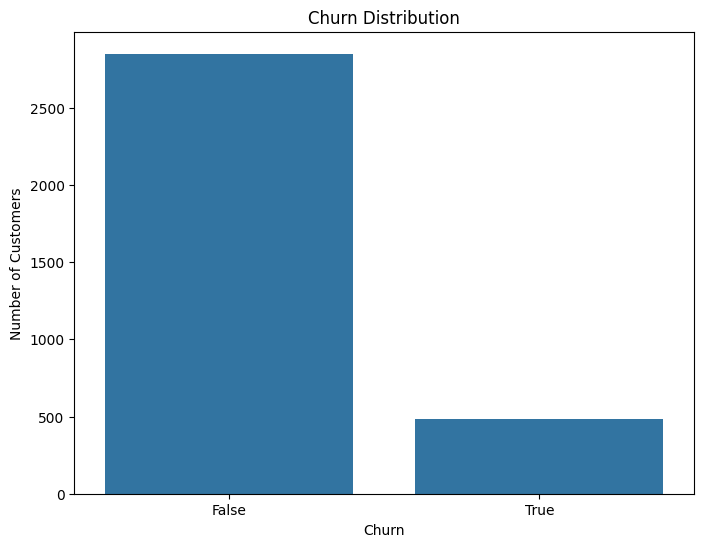

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', data=df)
    plt.title('Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Number of Customers')
    plt.show()
except NameError:
    print("The dataframe 'df' is not defined. Please ensure the previous code to load and merge the dataframes has been executed successfully.")
except Exception as e:
    print(f"An error occurred while plotting: {e}")



```
# This is formatted as code
```

*   the number of customers who do not churn is significantly higher than the number of those who do churn.


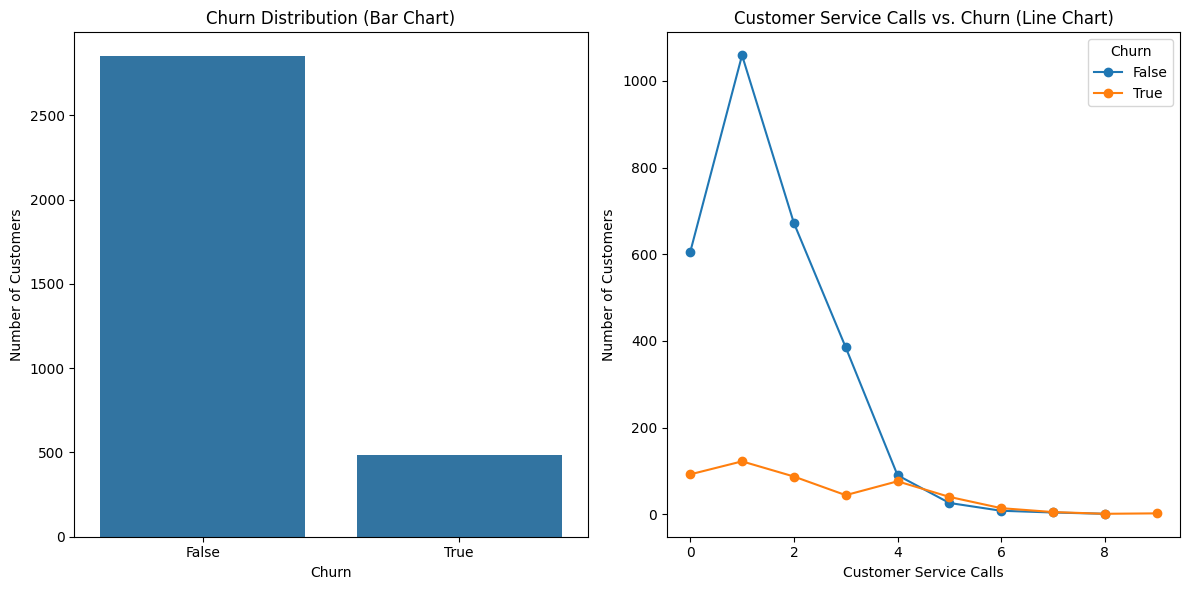

In [ ]:
# prompt: customer service calls par rapport churn distribution line chart and bar chart in the same chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df1 = pd.read_csv('churn-bigml-80.csv')
    df2 = pd.read_csv('churn-bigml-20.csv')
    df = pd.concat([df1, df2], ignore_index=True)
except FileNotFoundError:
    print("One or both of the files were not found.")
    exit() # Exit the script if files are not found
except Exception as e:
    print(f"An error occurred: {e}")
    exit()


try:
    plt.figure(figsize=(12, 6))

    # Bar chart for churn distribution
    ax1 = plt.subplot(121)  # Create a subplot for the bar chart
    sns.countplot(x='Churn', data=df, ax=ax1)
    ax1.set_title('Churn Distribution (Bar Chart)')
    ax1.set_xlabel('Churn')
    ax1.set_ylabel('Number of Customers')

    # Line chart for customer service calls vs churn
    ax2 = plt.subplot(122) # Create a subplot for the line chart
    churn_counts = df.groupby('Customer service calls')['Churn'].value_counts().unstack()
    churn_counts.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Customer Service Calls vs. Churn (Line Chart)')
    ax2.set_xlabel('Customer Service Calls')
    ax2.set_ylabel('Number of Customers')


    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

except KeyError as e:
    print(f"Error: Column '{e}' not found in the dataframe. Please check your column names.")

except Exception as e:
    print(f"An error occurred while plotting: {e}")

* Customers who don’t churn rarely contact customer service, with more than 1,000 of them having made at most one call.


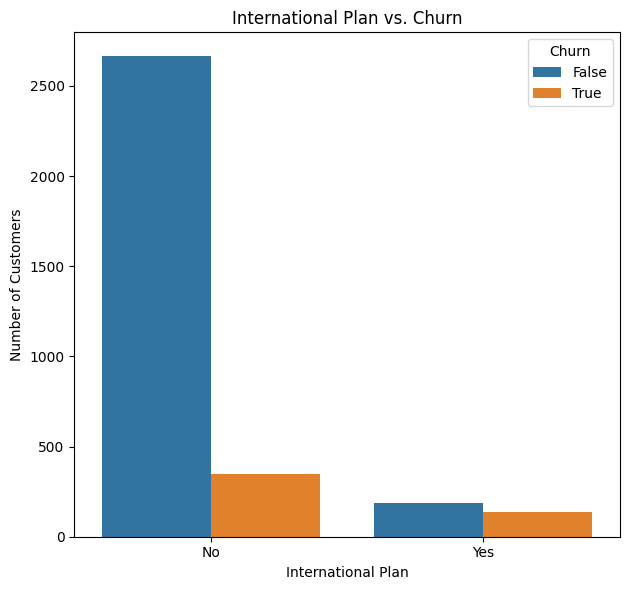

In [ ]:
# prompt: international plan vs churn chart

try:
    plt.figure(figsize=(12, 6))

    # Bar chart for international plan vs churn
    ax1 = plt.subplot(121)  # Create a subplot for the bar chart
    sns.countplot(x='International plan', hue='Churn', data=df, ax=ax1)
    ax1.set_title('International Plan vs. Churn')
    ax1.set_xlabel('International Plan')
    ax1.set_ylabel('Number of Customers')


    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

except KeyError as e:
    print(f"Error: Column '{e}' not found in the dataframe. Please check your column names.")

except Exception as e:
    print(f"An error occurred while plotting: {e}")

* The majority of customers do not have an international plan.
* Customers without an international plan are far less likely to churn.

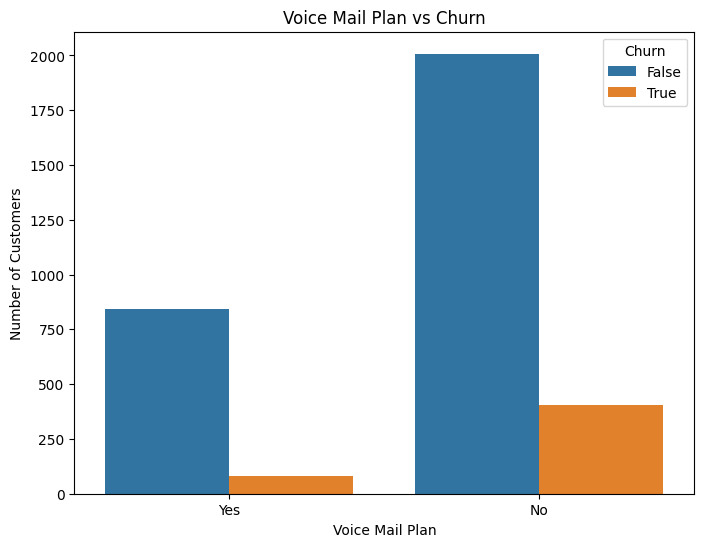

In [ ]:
# prompt: voice mail plan vs chrun

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Analyze Voice mail plan vs Churn
try:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Voice mail plan', hue='Churn', data=df)
    plt.title('Voice Mail Plan vs Churn')
    plt.xlabel('Voice Mail Plan')
    plt.ylabel('Number of Customers')
    plt.show()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the dataframe. Please check your column names.")
except Exception as e:
    print(f"An error occurred while generating the plot: {e}")

* The majority of customers do not have a voice mail plan.
* Customers without a voicemail plan are more likely to churn compared to those with one.

In [ ]:
def diff_bar(x,y):

    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

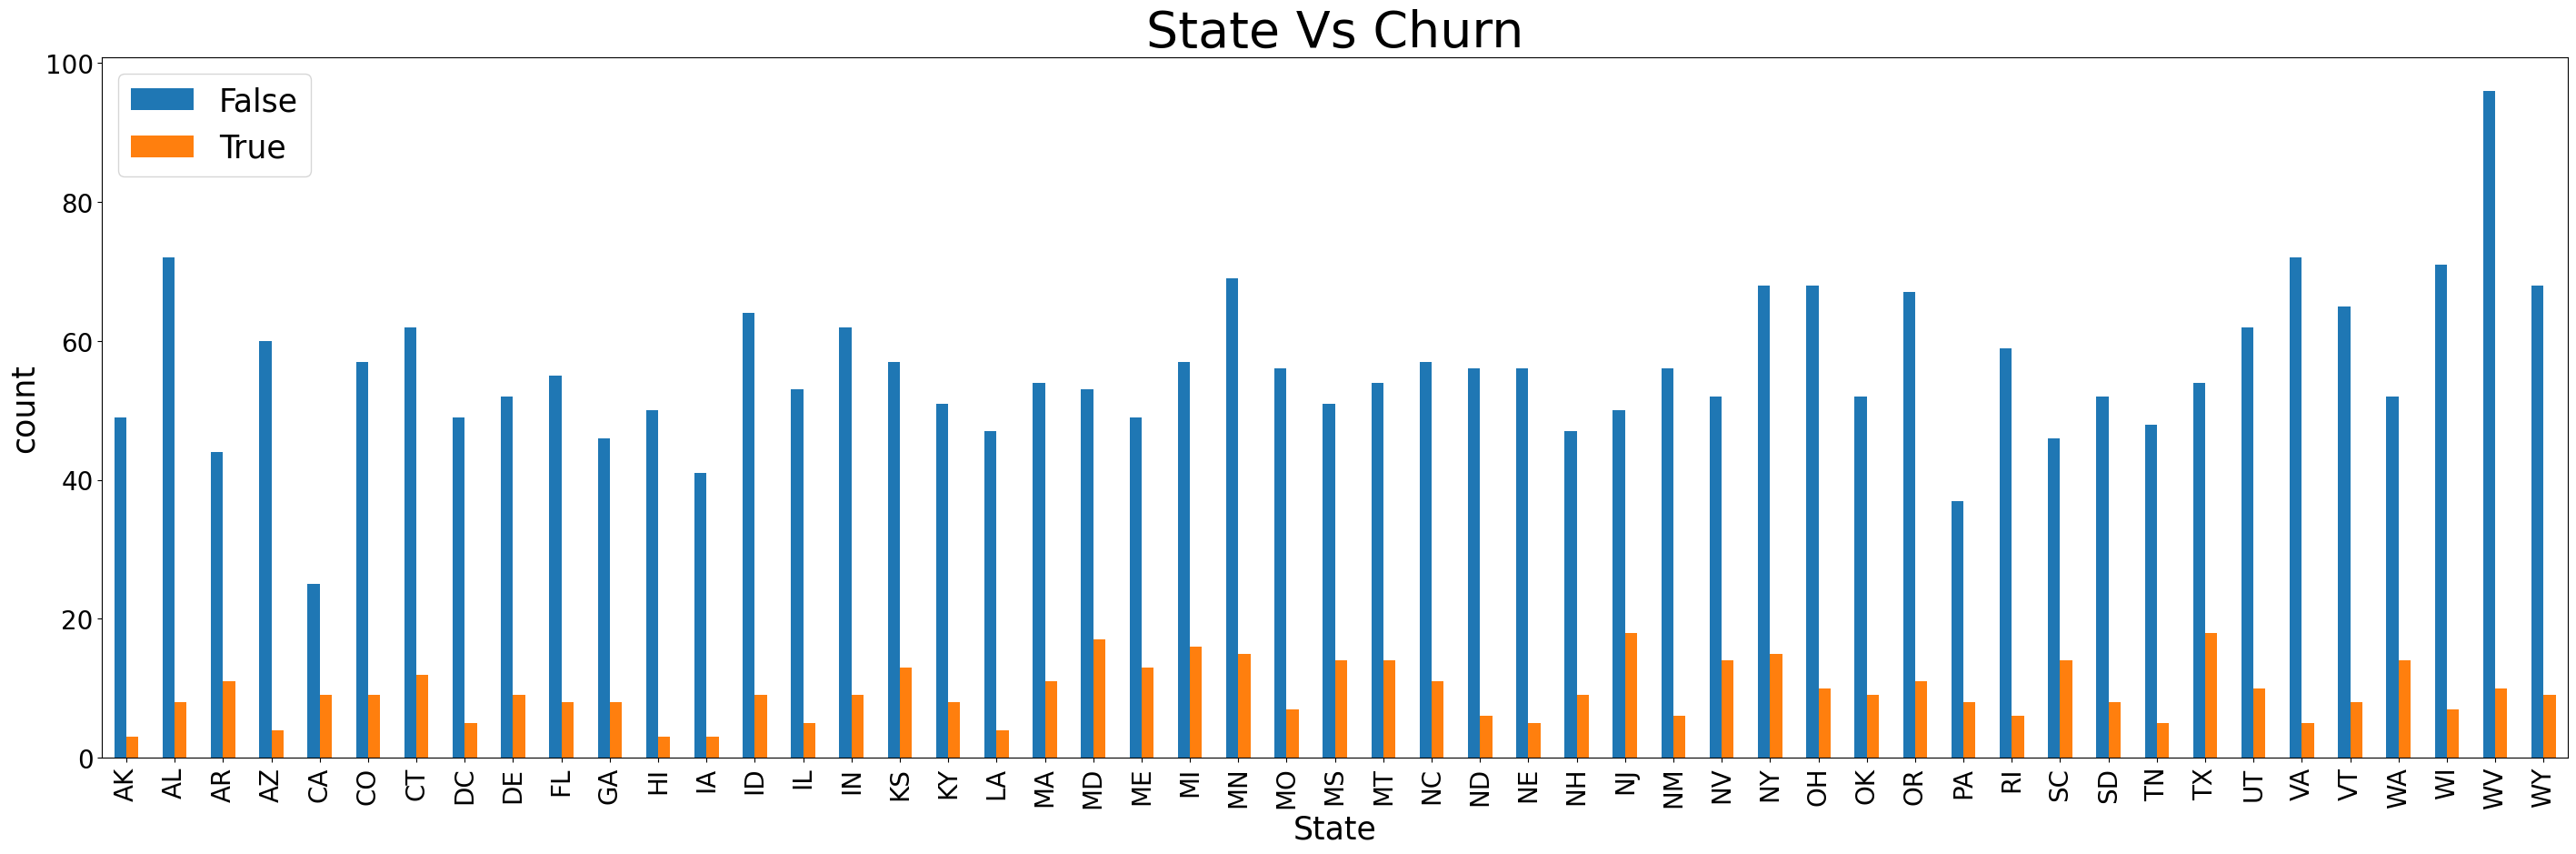

In [ ]:
diff_bar('State','Churn')


*	Customers from west virginia are more likely to not change firm
*	new jersey and texas have the highest churn count


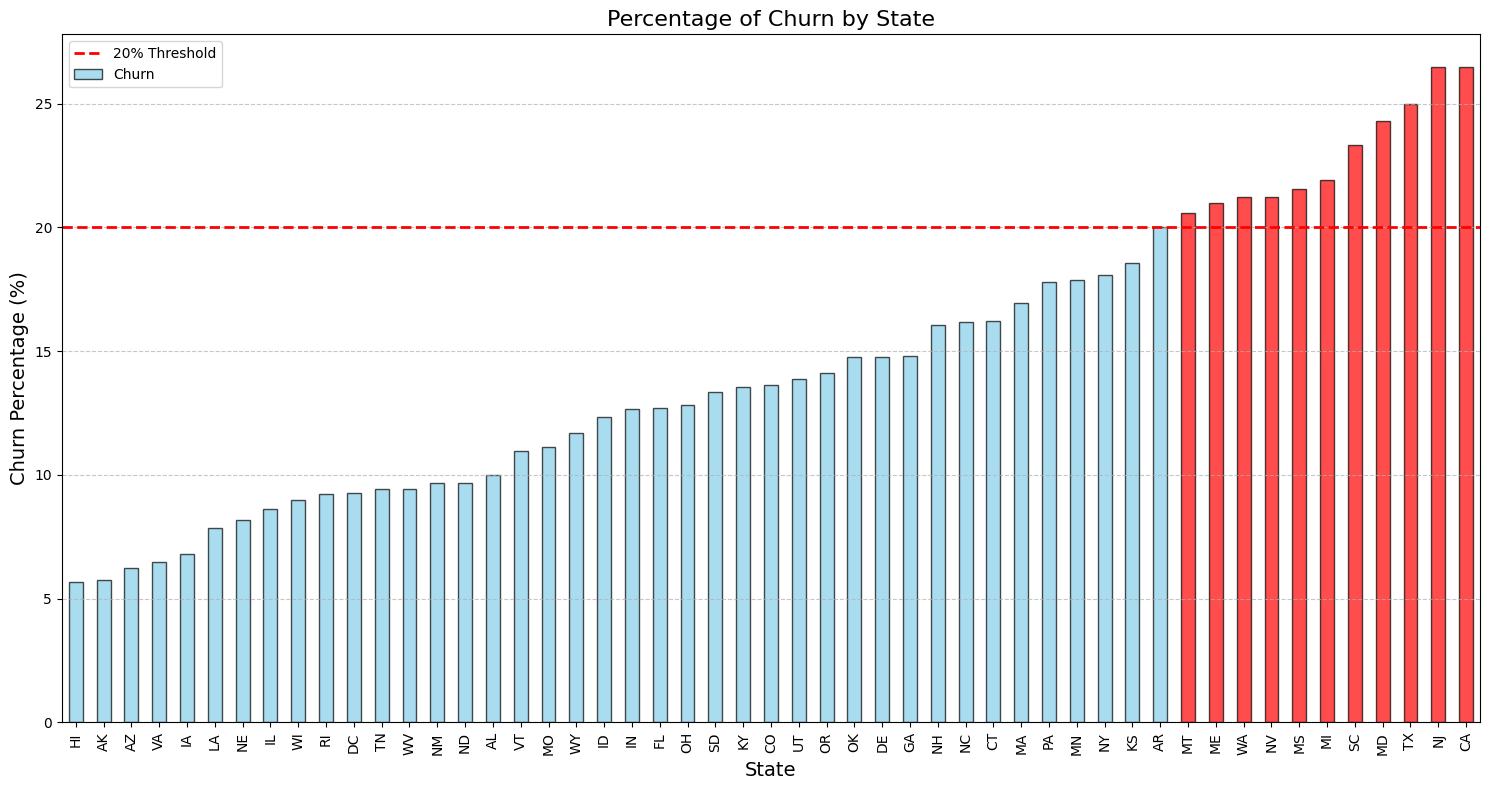

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'

# Convert 'Churn' column to binary indicator if not already (True = 1, False = 0)
df['Churn'] = df['Churn'].astype(int)

# Calculate churn percentage for each state
state_churn_percentage = df.groupby('State')['Churn'].mean() * 100

# Sort states by churn percentage
state_churn_percentage = state_churn_percentage.sort_values()

# Highlight states with churn > 20%
colors = ['red' if value > 20 else 'skyblue' for value in state_churn_percentage]

# Plot the churn percentages with highlights
plt.figure(figsize=(15, 8))
bars = state_churn_percentage.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Add a red dashed line at 20%
plt.axhline(20, color='red', linestyle='--', linewidth=2, label='20% Threshold')

# Add labels and title
plt.title('Percentage of Churn by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Churn Percentage (%)', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better appearance
plt.tight_layout()
plt.show()


<ipython-input-13-c68061b69489>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='Set2')


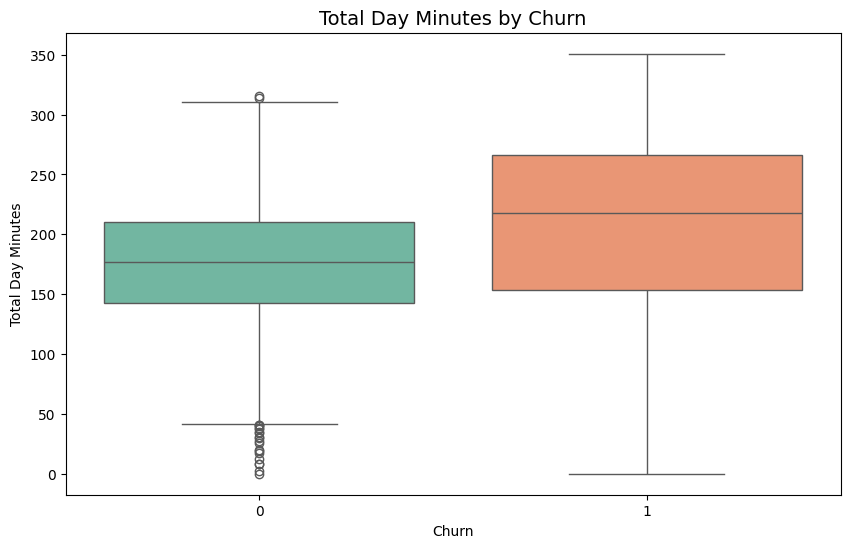

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Total day minutes vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='Set2')
plt.title('Total Day Minutes by Churn', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


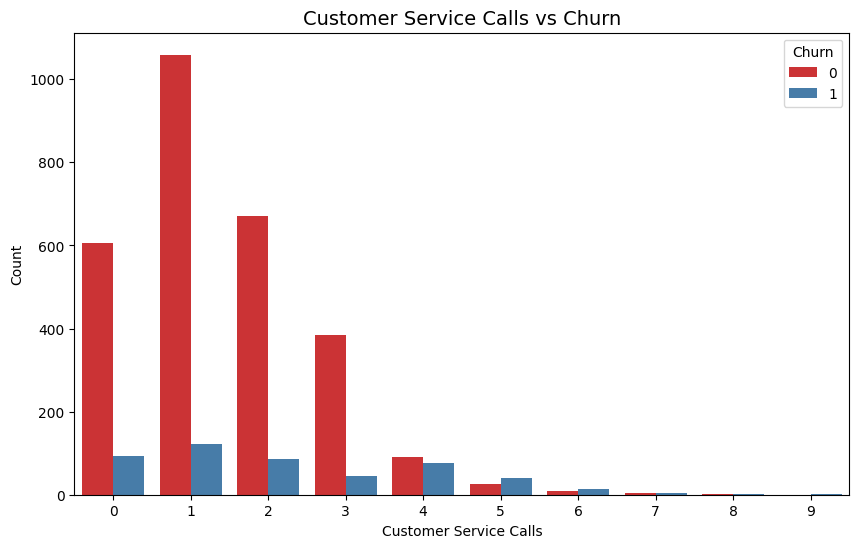

In [ ]:
# Barplot for Customer service calls by churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Set1')
plt.title('Customer Service Calls vs Churn', fontsize=14)
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()


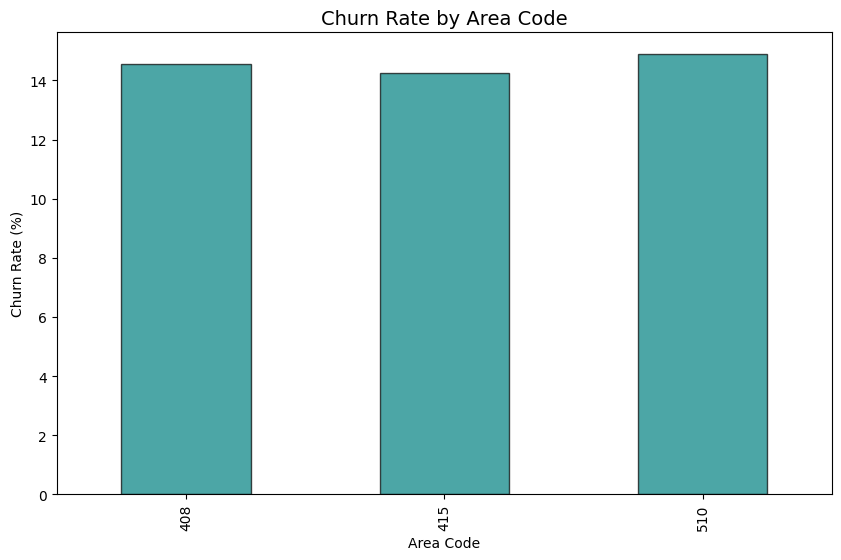

In [ ]:
# Churn rate by Area code
area_churn = df.groupby('Area code')['Churn'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
area_churn.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.title('Churn Rate by Area Code', fontsize=14)
plt.xlabel('Area Code')
plt.ylabel('Churn Rate (%)')
plt.show()


* The churn rate is relatively consistent across all regions.

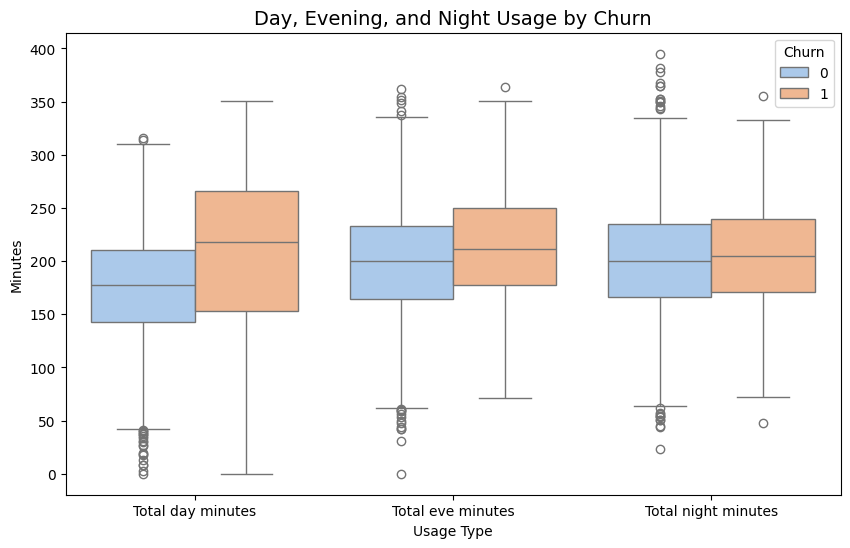

In [ ]:
# Total usage comparison by churn
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars=['Churn'], value_vars=['Total day minutes', 'Total eve minutes', 'Total night minutes'])
sns.boxplot(x='variable', y='value', hue='Churn', data=df_melted, palette='pastel')
plt.title('Day, Evening, and Night Usage by Churn', fontsize=14)
plt.xlabel('Usage Type')
plt.ylabel('Minutes')
plt.show()


* Customers who churn tend to have higher total daytime usage compared to those who don’t churn , with a median value significantly above that of non-churning customers.
* Evening and nighttime usage do not show significant differences between churn and non-churn groups


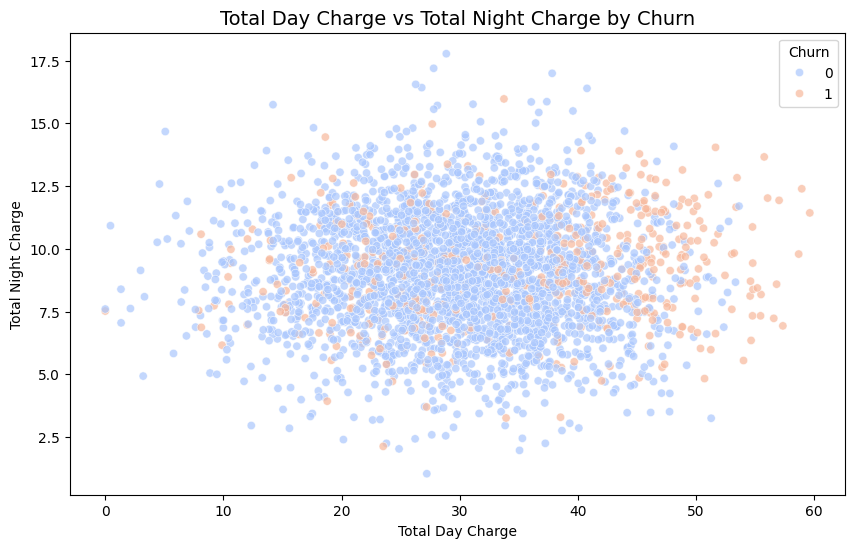

In [ ]:
# Scatterplot for Total day charge vs Total night charge by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total day charge', y='Total night charge', hue='Churn', data=df, palette='coolwarm', alpha=0.7)
plt.title('Total Day Charge vs Total Night Charge by Churn', fontsize=14)
plt.xlabel('Total Day Charge')
plt.ylabel('Total Night Charge')
plt.show()


* Churn is not clearly related to charges: The overlap in distributions shows that Total Day Charge and Total Night Charge do not strongly differentiate between churned and non-churned customers.

## Verify Data Quality

### Missing values

In [ ]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

### Outliers

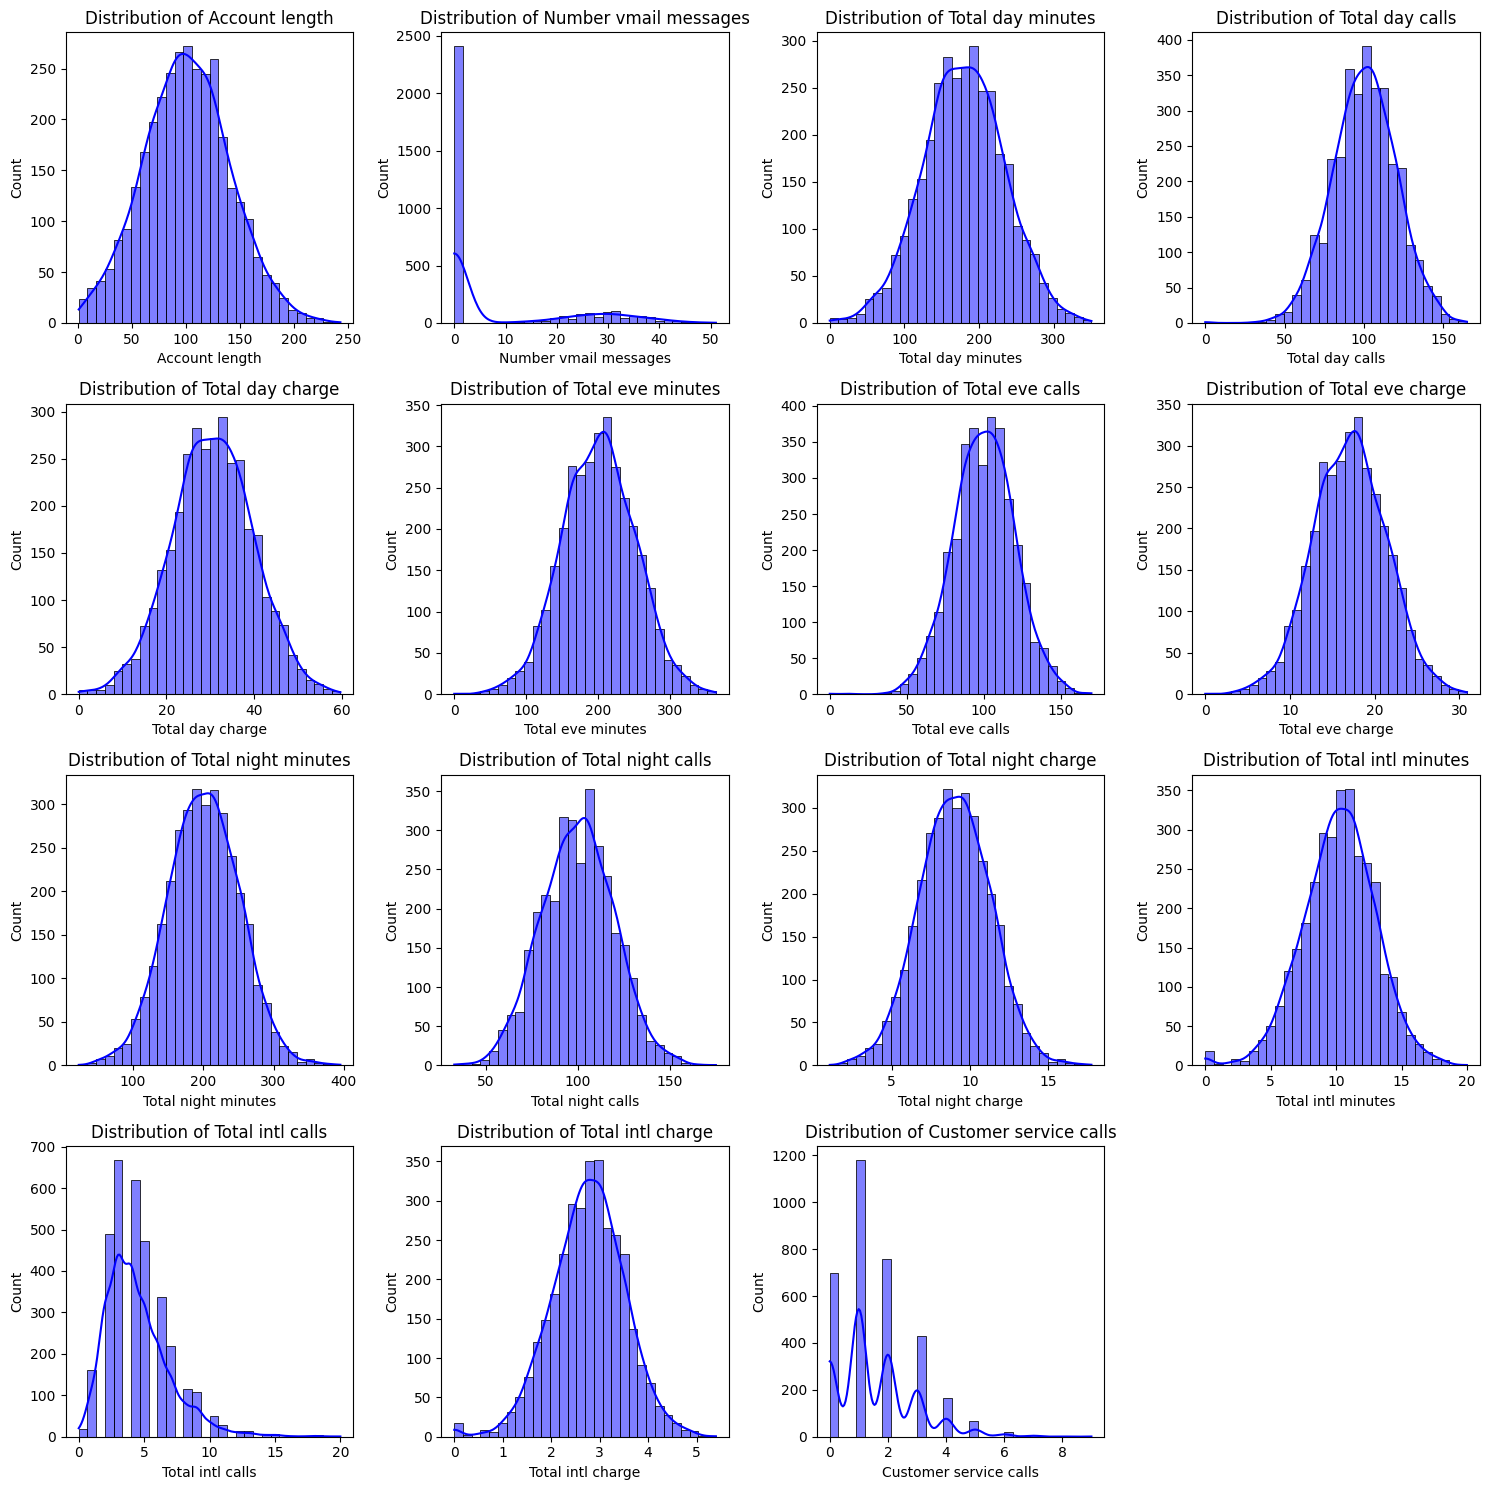

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'df' with your DataFrame variable name
# List of numerical columns to check for normal distribution
numerical_cols = [
    'Account length','Number vmail messages'	,
'Total day minutes'	,
'Total day calls'	,
'Total day charge'	,
'Total eve minutes',
'Total eve calls',
'Total eve charge',
'Total night minutes',
'Total night calls',
'Total night charge',
'Total intl minutes',
'Total intl calls',
'Total intl charge',
'Customer service calls'
]

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Change the grid size to 4 rows and 3 columns
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



Why Z-Score is Suitable
Assumes Normality:
Z-Score relies on the standard deviation and mean, making it effective for normally distributed data.
Simplicity:
Straightforward to calculate and apply.

In [ ]:
from scipy.stats import zscore
import numpy as np



# Calculate Z-Scores for numerical features
z_scores = np.abs(zscore(df[numerical_cols]))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Find rows with outliers
outliers = (z_scores > threshold).any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")

# Optional: View outlier rows
outlier_rows = df[outliers]
print(outlier_rows)


Number of rows with outliers: 164
     State  Account length  Area code International plan Voice mail plan  \
19      AZ             130        415                 No              No   
27      LA             172        408                 No              No   
35      MD             135        408                Yes             Yes   
93      ME              36        510                Yes             Yes   
145     KS              70        408                 No              No   
...    ...             ...        ...                ...             ...   
3248    NC              95        408                 No              No   
3296    WV              58        408                 No             Yes   
3309    MA              87        408                 No              No   
3320    NY             120        510                 No             Yes   
3325    CA             127        510                 No              No   

      Number vmail messages  Total day minutes  Total

Percentage of outliers in each column:
Account length: 0.21%
Number vmail messages: 0.09%
Total day minutes: 0.27%
Total day calls: 0.27%
Total day charge: 0.27%
Total eve minutes: 0.27%
Total eve calls: 0.21%
Total eve charge: 0.27%
Total night minutes: 0.33%
Total night calls: 0.18%
Total night charge: 0.33%
Total intl minutes: 0.66%
Total intl calls: 1.50%
Total intl charge: 0.66%
Customer service calls: 1.05%


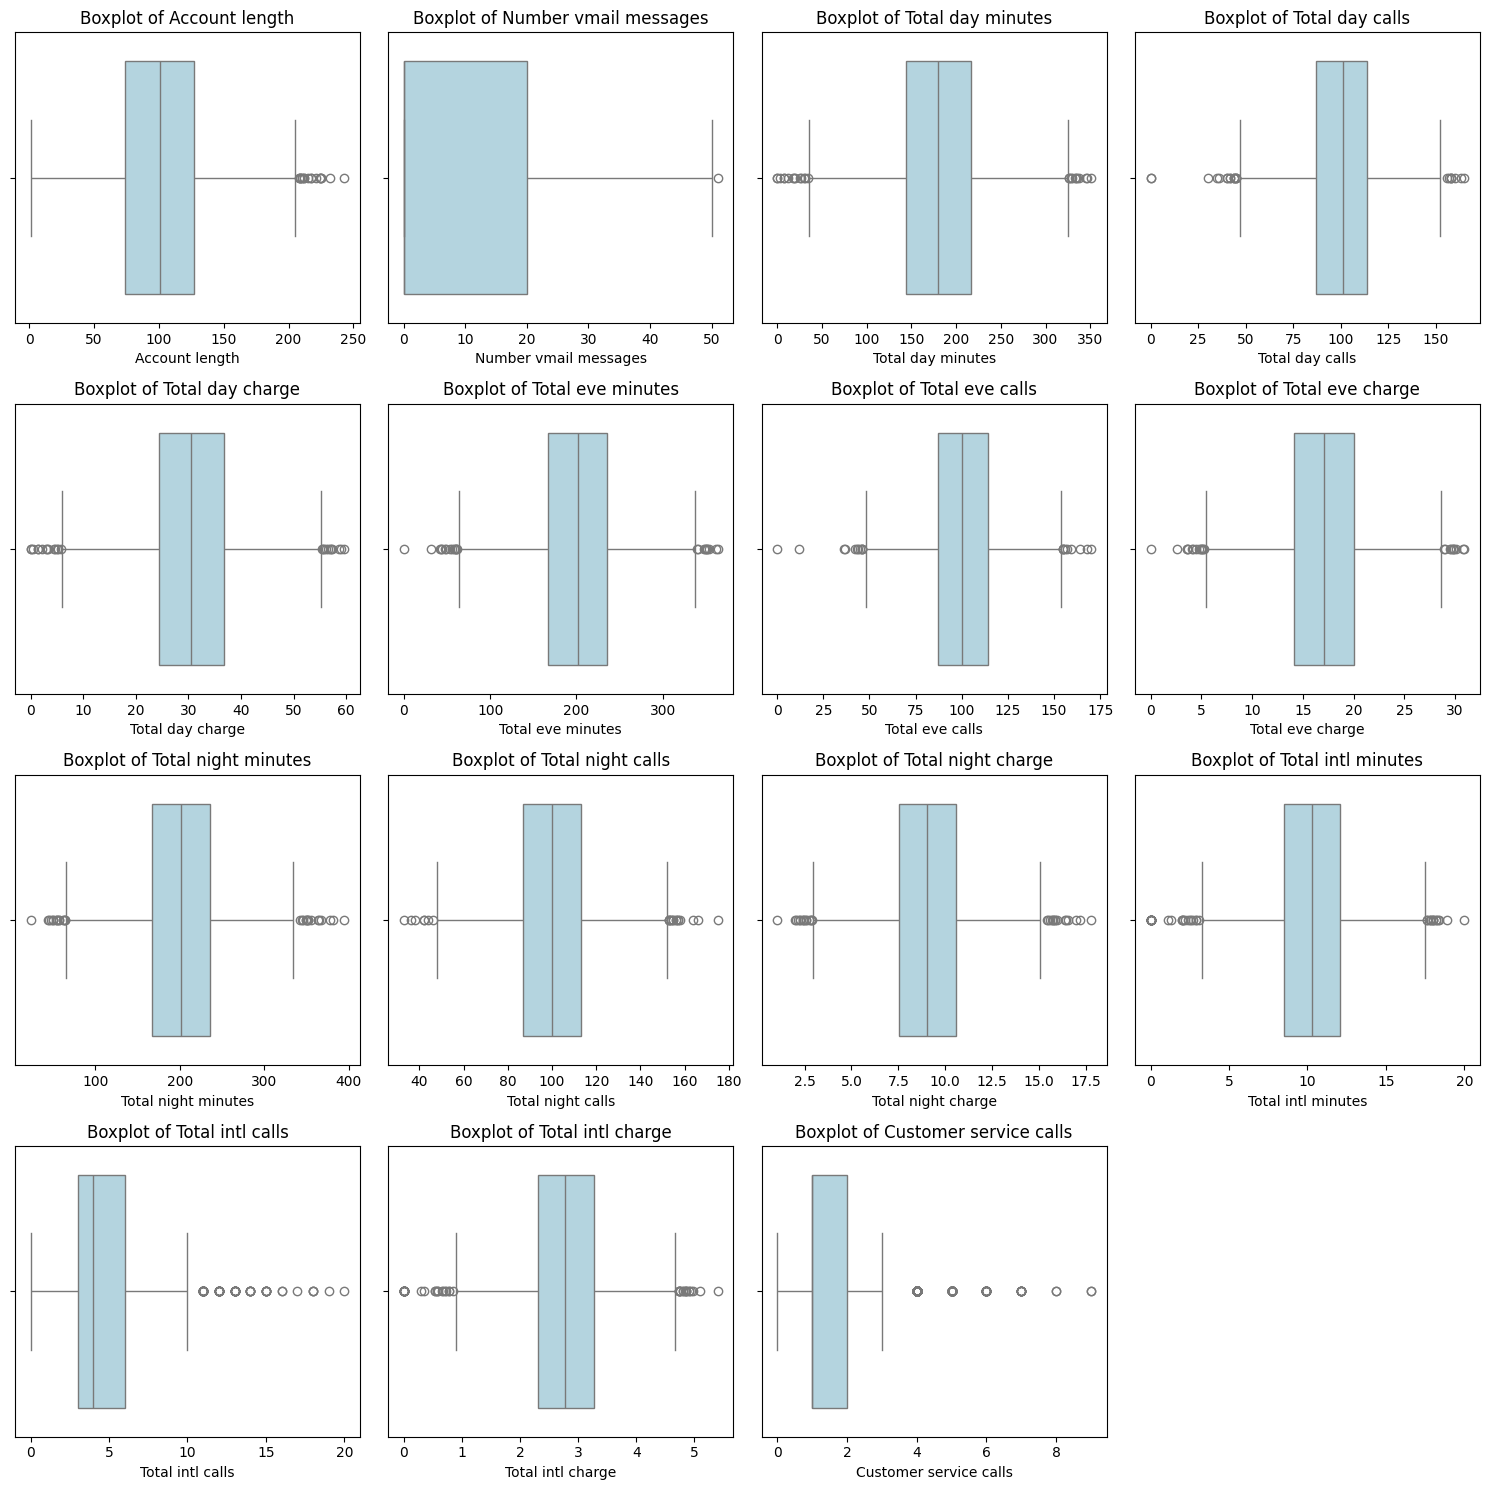

In [ ]:
# Calculate Z-Scores for numerical features
z_scores = np.abs(zscore(df[numerical_cols]))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Calculate the percentage of outliers for each column
outlier_percentages = (outliers.sum(axis=0) / len(df)) * 100

# Print outlier percentages
print("Percentage of outliers in each column:")
for col, perc in zip(numerical_cols, outlier_percentages):
    print(f"{col}: {perc:.2f}%")

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-23-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')
<ipython-input-23-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')
<ipython-input-23-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')


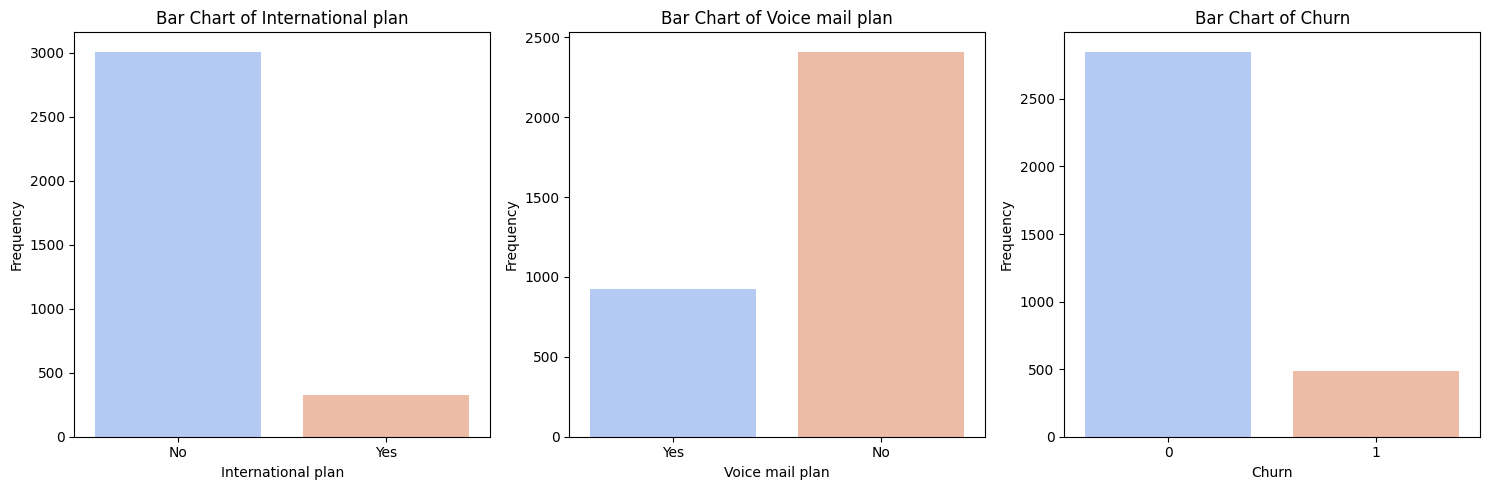

In [ ]:
categorical_cols = ['International plan', 'Voice mail plan', 'Churn']

# Plot bar charts for each categorical feature
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

No outliers for Categorical features

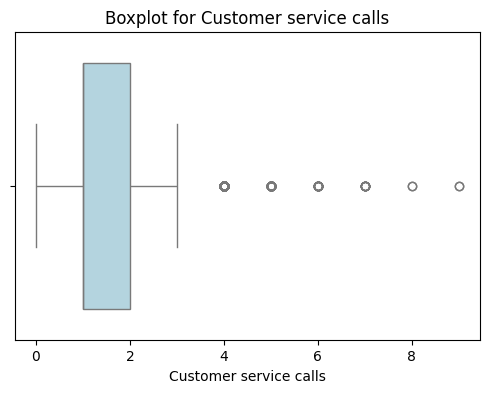

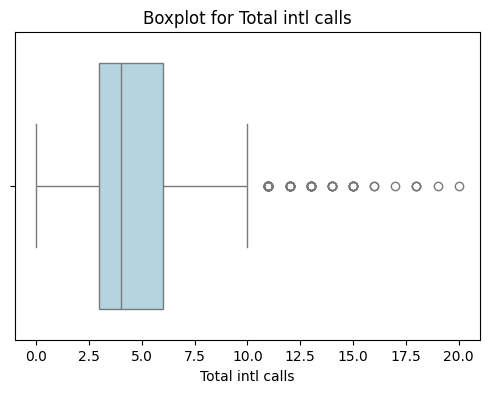

Percentage of outliers detected using IQR method:
Customer service calls: 8.01%
Total intl calls: 2.34%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for IQR outlier detection
columns_to_check = ['Customer service calls', 'Total intl calls']

# Initialize dictionary to store outlier percentages
outlier_percentages = {}

# IQR Method for outlier detection
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentages[col] = (len(outliers) / len(df)) * 100

    # Boxplot for the feature
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

# Print outlier percentages
print("Percentage of outliers detected using IQR method:")
for col, perc in outlier_percentages.items():
    print(f"{col}: {perc:.2f}%")


### Data Transformation

In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:")
categorical_features

Categorical features:


['State', 'International plan', 'Voice mail plan']

In [ ]:
# Encode 'International plan' and 'Voice mail plan'
df['International plan'] = df['International plan'].map({'No': 0, 'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No': 0, 'Yes': 1})

# Now you can use the updated DataFrame 'df' for further analysis or modeling.
print(df.head())

  State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1         

To decide the best method for encoding the `State` column based on the **number of added columns** and balancing interpretability, computational efficiency, and model performance, here is a comparison :

---

 **Encoding Methods and Their Impact**
#### 1. **Label Encoding**
- **Number of added columns**: 1.
- **Description**: Each state is assigned a unique numeric ID.
- **Suitability**:
  - Ideal if there is no ordinal relationship among states (common for geographic regions).
  - May introduce unintended bias if numeric values are incorrectly interpreted as ordinal.
- **Use Case**: Works well for tree-based models (e.g., Gradient Boosting, Random Forest) that handle categorical data naturally.

---

#### 2. **Frequency Encoding**
- **Number of added columns**: 1.
- **Description**: Each state is replaced with its frequency in the dataset.
- **Suitability**:
  - Captures how frequently each state appears.
  - Useful when the frequency of occurrence might affect churn rates.
  - Retains only one column but adds some contextual information.
- **Use Case**: Works well when state frequency correlates with churn.

---

#### 3. **Mean Target Encoding**
- **Number of added columns**: 1.
- **Description**: Replaces each state with the average churn rate for that state.
- **Suitability**:
  - Provides a data-driven representation of the state’s relationship with churn.
  - Requires caution to prevent data leakage (apply separately to training and test sets).
- **Use Case**: Effective when states have a significant relationship with churn.

---

#### 4. **Binary Encoding**
- **Number of added columns**: \( \lceil \log_2(\text{number of unique states}) \rceil \).
- **Description**: Each state is encoded as a binary representation.
- **Suitability**:
  - Efficient for high-cardinality categorical variables.
  - Retains a numeric representation without creating excessive columns.
- **Use Case**: Suitable for datasets with many unique states but fewer rows.

---

#### 5. **Hash Encoding**
- **Number of added columns**: Predefined (e.g., 8 or 16).
- **Description**: Each state is hashed into a fixed number of columns.
- **Suitability**:
  - Reduces dimensionality regardless of the number of unique states.
  - Loses some interpretability compared to other methods.
- **Use Case**: Useful when the dataset has many unique states.

---

### **Decision Table**
| **Method**           | **Added Columns**                   | **Best For**                          | **Suitability for `State`**        |
|-----------------------|-------------------------------------|----------------------------------------|-------------------------------------|
| Label Encoding        | 1                                  | Low cardinality, interpretability.     | ✅ Suitable for simplicity.         |
| Frequency Encoding    | 1                                  | Relationship between frequency & churn.| ✅ Good for insights.               |
| Mean Target Encoding  | 1                                  | Correlation with target variable.      | ✅ Excellent but prone to leakage.  |
| Binary Encoding       | log_2(51) = 6 \ | High cardinality, reduced dimensions. | ✅ Efficient for modeling.          |
| Hash Encoding         | Predefined (e.g., 8 or 16)         | Very high cardinality.                 | ❌ Overhead for only 51 states.     |

---


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'State' column
df['State_encoded'] = label_encoder.fit_transform(df['State'])

# Display the first few rows to verify the encoding
print(df[['State', 'State_encoded']].head())

# If you need to decode or see the mapping
state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("State to numeric mapping:")
print(state_mapping)

  State  State_encoded
0    KS             16
1    OH             35
2    NJ             31
3    OH             35
4    OK             36
State to numeric mapping:
{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}


In [ ]:
# Drop the 'State' column
df = df.drop('State', axis=1)
print(df.head())

   Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5        

## PCA

In [ ]:
df_scaled = df.copy()

In [ ]:
# prompt: scale and standarize the data for the PCA

from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'numerical_cols' contains the numerical column names
numerical_cols = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls', 'International plan',
    'Voice mail plan', 'State_encoded'
]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now your numerical features are scaled and standardized, and ready for PCA.
print(df_scaled.head())

   Account length  Area code  International plan  Voice mail plan  \
0        0.676489        415           -0.327580         1.617086   
1        0.149065        415           -0.327580         1.617086   
2        0.902529        415           -0.327580        -0.618396   
3       -0.428590        408            3.052685        -0.618396   
4       -0.654629        415            3.052685        -0.618396   

   Number vmail messages  Total day minutes  Total day calls  \
0               1.234883           1.566767         0.476643   
1               1.307948          -0.333738         1.124503   
2              -0.591760           1.168304         0.675985   
3              -0.591760           2.196596        -1.466936   
4              -0.591760          -0.240090         0.626149   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0          1.567036          -0.070610        -0.055940         -0.070427   
1         -0.334013          -0.108080        

In [ ]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']


In [ ]:
X

Account length  Area code  International plan  Voice mail plan  \
0           0.676489        415           -0.327580         1.617086   
1           0.149065        415           -0.327580         1.617086   
2           0.902529        415           -0.327580        -0.618396   
3          -0.428590        408            3.052685        -0.618396   
4          -0.654629        415            3.052685        -0.618396   
...              ...        ...                 ...              ...   
3328        0.324873        415           -0.327580         1.617086   
3329        0.123950        408           -0.327580         1.617086   
3330       -1.031361        415           -0.327580        -0.618396   
3331        1.455068        415           -0.327580        -0.618396   
3332        2.082955        510            3.052685        -0.618396   

      Number vmail messages  Total day minutes  Total day calls  \
0                  1.234883           1.566767         0.476643   
1                  1.307948          -0.333738         1.124503   
2                 -0.591760           1.168304         0.675985   
3                 -0.591760           2.196596        -1.466936   
4                 -0.591760          -0.240090         0.626149   
...                     ...                ...              ...   
3328               1.307948          -0.783616        -0.619735   
3329               1.527146          -1.766002         1.523186   
3330              -0.591760           0.259367         0.875326   
3331              -0.591760          -0.183166         0.675985   
3332              -0.591760           0.624778         0.227466   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             1.567036          -0.070610        -0.055940         -0.070427   
1            -0.334013          -0.108080         0.144867         -0.107549   
2             1.168464          -1.573383         0.496279         -1.573900   
3             2.196759          -2.742865        -0.608159         -2.743268   
4            -0.240041          -1.038932         1.098699         -1.037939   
...                ...                ...              ...               ...   
3328         -0.783352          -0.892994         1.249304         -0.894089   
3329         -1.766281           0.057580         1.550515          0.057183   
3330          0.258985          -2.287299         0.496279         -2.286193   
3331         -0.182793          -0.064693         0.245270         -0.065786   
3332          0.625153          -0.816080        -0.808966         -0.815203   

      Total night minutes  Total night calls  Total night charge  \
0                0.866743          -0.465494            0.866029   
1                1.058571           0.147825            1.059390   
2               -0.756869           0.198935           -0.755571   
3               -0.078551          -0.567714           -0.078806   
4               -0.276311           1.067803           -0.276562   
...                   ...                ...                 ...   
3328             0.924094          -0.312165            0.923158   
3329             0.566148          -1.385473            0.567197   
3330             0.182492           1.732232            0.180474   
3331            -0.141834          -0.925484           -0.140330   
3332            -1.219628           1.885562           -1.221396   

      Total intl minutes  Total intl calls  Total intl charge  \
0              -0.085008         -0.601195          -0.085690   
1               1.240482         -0.601195           1.241169   
2               0.703121          0.211534           0.697156   
3              -1.303026          1.024263          -1.306401   
4              -0.049184         -0.601195          -0.045885   
...                  ...               ...                ...   
3328            0.452353          1.024263           0.458322   
3329           -0.765665         -0.60

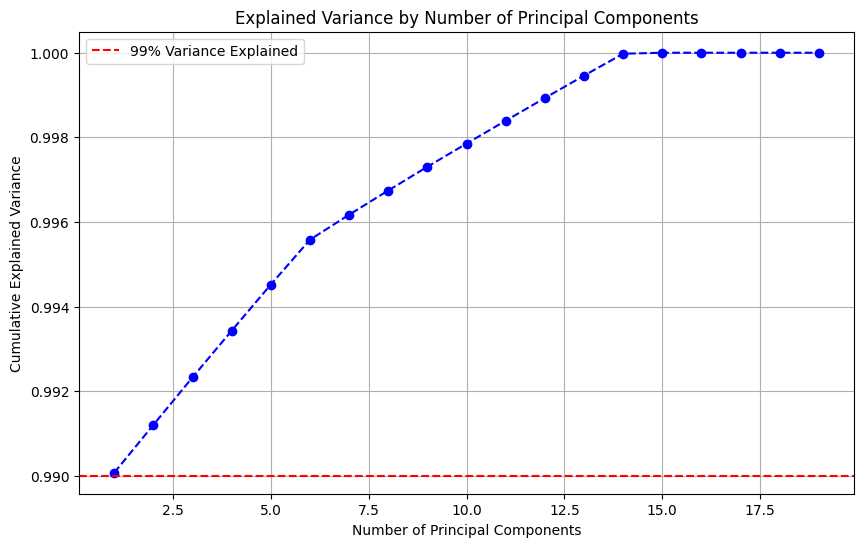

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Elbow method to choose the number of principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.99, color='r', linestyle='--', label='99% Variance Explained')  # Optional threshold line
plt.legend()
plt.show()

* Two components capture approximately 99% of the variance.

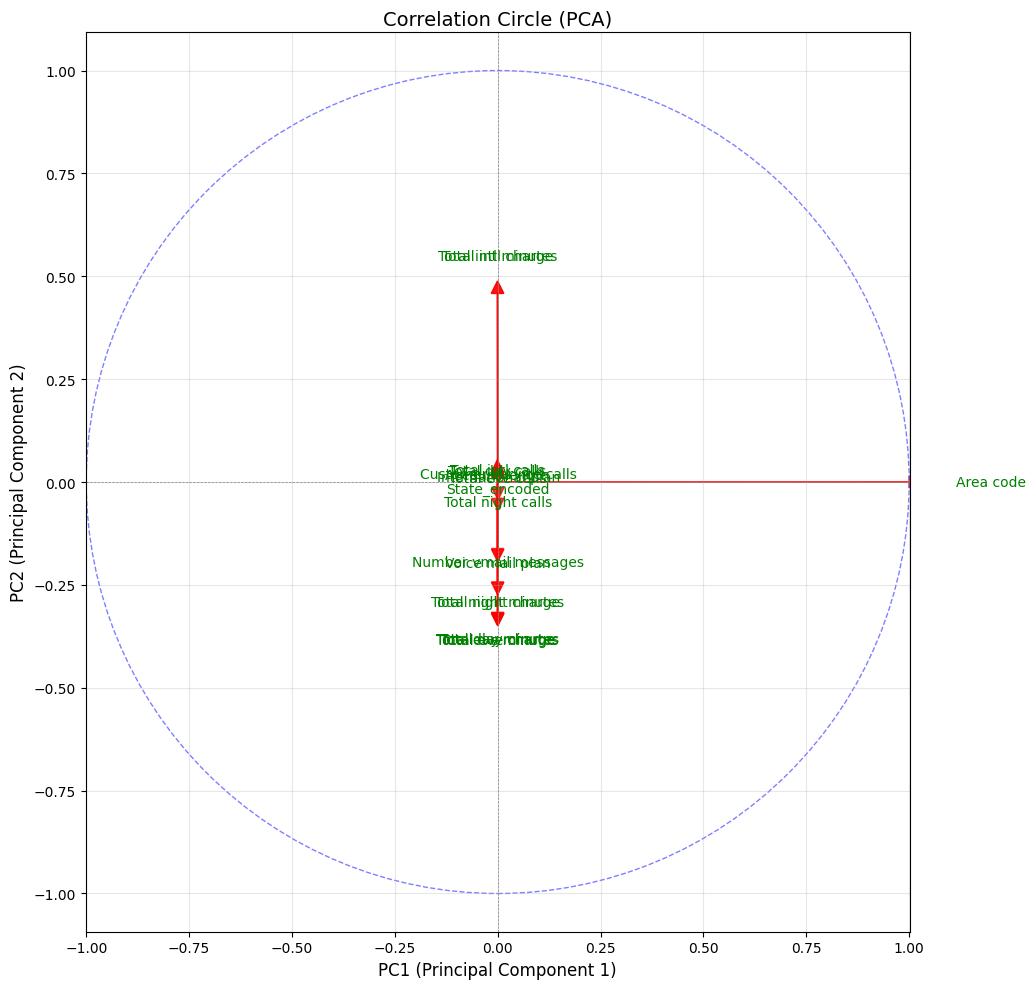

In [ ]:
 from sklearn.decomposition import PCA
 import matplotlib.pyplot as plt
 # Perform PCA
 pca = PCA(n_components=2)
 X_reduced = pca.fit_transform(X)
 # Correlation Circle
 plt.figure(figsize=(10, 10))  # Larger figure for better visibility
 ax = plt.gca()

 # Plot each feature as an arrow
 for i in range(pca.components_.shape[1]):  # Match the number of features in the PCA space
     plt.arrow(0, 0,
               pca.components_[0, i], pca.components_[1, i],
               color='r', alpha=0.75, head_width=0.03, head_length=0.03)
     plt.text(pca.components_[0, i] * 1.2,
              pca.components_[1, i] * 1.2,
              X.columns[i], color='g', fontsize=10, ha='center', va='center')
 # Add circle boundary
 circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
 ax.add_artist(circle)
 # Make the axes equal to ensure the circle looks round
 plt.axis('equal')
 # Set limits for better visualization
 plt.xlim(-1.1, 1.1)
 plt.ylim(-1.1, 1.1)
 # Add grid and labels
 plt.title('Correlation Circle (PCA)', fontsize=14)
 plt.xlabel('PC1 (Principal Component 1)', fontsize=12)
 plt.ylabel('PC2 (Principal Component 2)', fontsize=12)
 plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
 plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
 plt.grid(alpha=0.3)
 # Show the plot
 plt.tight_layout()
 plt.show()

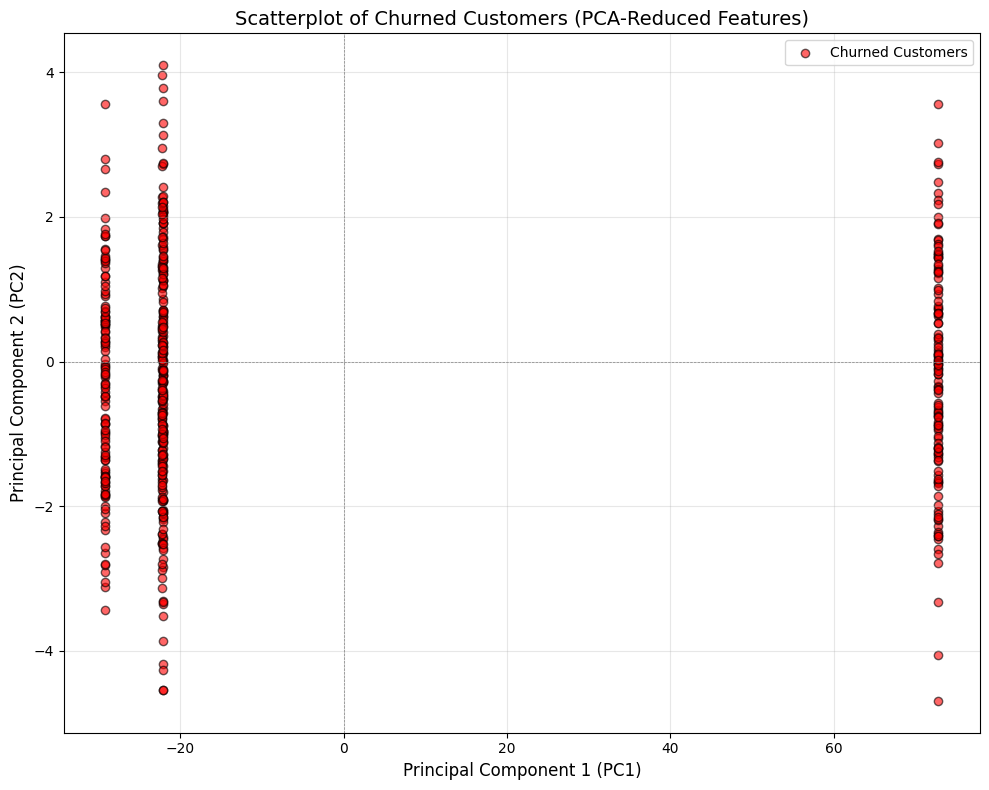

In [ ]:
# Scatterplot of churned customers using PCA-reduced components
plt.figure(figsize=(10, 8))  # Set figure size for better visibility
churned_customers = y == 1  # Assuming `y` contains the target variable (Churn: 1 for churned)

# Plot only churned customers
plt.scatter(X_reduced[churned_customers, 0], X_reduced[churned_customers, 1],
            color='red', alpha=0.6, label='Churned Customers', edgecolor='k')

# Add title and labels
plt.title('Scatterplot of Churned Customers (PCA-Reduced Features)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)

# Add legend
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


Feature Importances for Each Principal Component:
   Account length  Area code  International plan  Voice mail plan  \
0       -0.000294   0.999998            0.001147        -0.000018   
1        0.014999   0.000274            0.010288        -0.163707   

   Number vmail messages  Total day minutes  Total day calls  \
0              -0.000047          -0.000195        -0.000228   
1              -0.161478          -0.317059         0.021505   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0         -0.000195           0.000085        -0.000281          0.000085   
1         -0.317062          -0.319370         0.008580         -0.319369   

   Total night minutes  Total night calls  Total night charge  \
0            -0.000138           0.000390           -0.000138   
1            -0.243236          -0.039612           -0.243226   

   Total intl minutes  Total intl calls  Total intl charge  \
0           -0.000432         -0.000571          -0.000435 

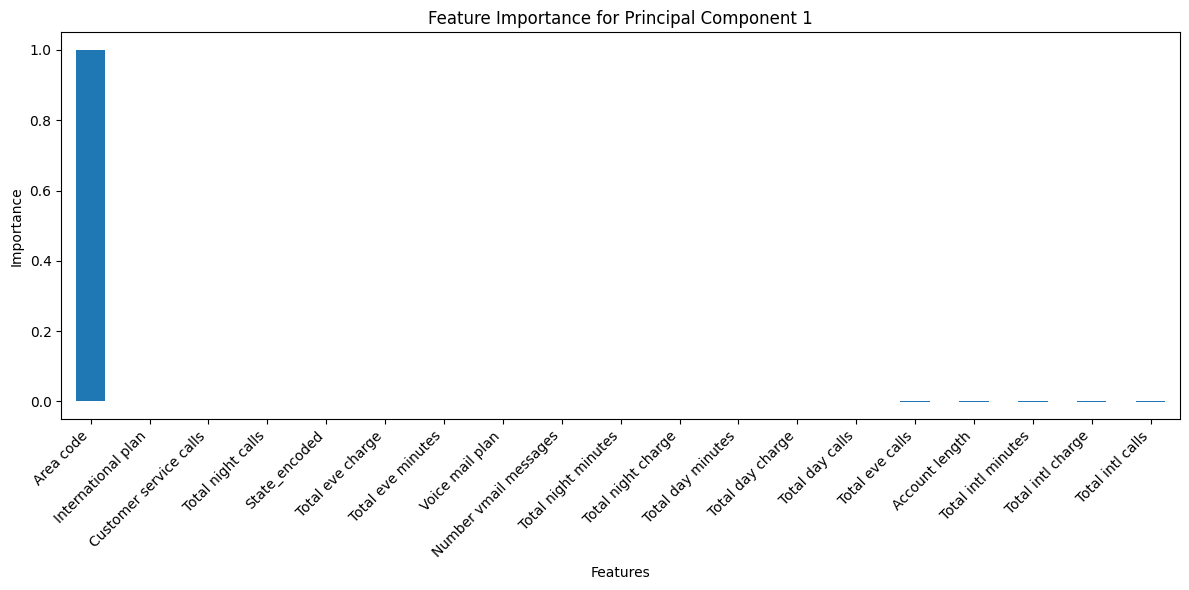


Feature Importances for Principal Component 1:
Area code                 1.0
International plan        0.0
Customer service calls    0.0
Total night calls         0.0
State_encoded             0.0
Total eve charge          0.0
Total eve minutes         0.0
Voice mail plan          -0.0
Number vmail messages    -0.0
Total night minutes      -0.0
Total night charge       -0.0
Total day minutes        -0.0
Total day charge         -0.0
Total day calls          -0.0
Total eve calls          -0.0
Account length           -0.0
Total intl minutes       -0.0
Total intl charge        -0.0
Total intl calls         -0.0
Name: 0, dtype: float64


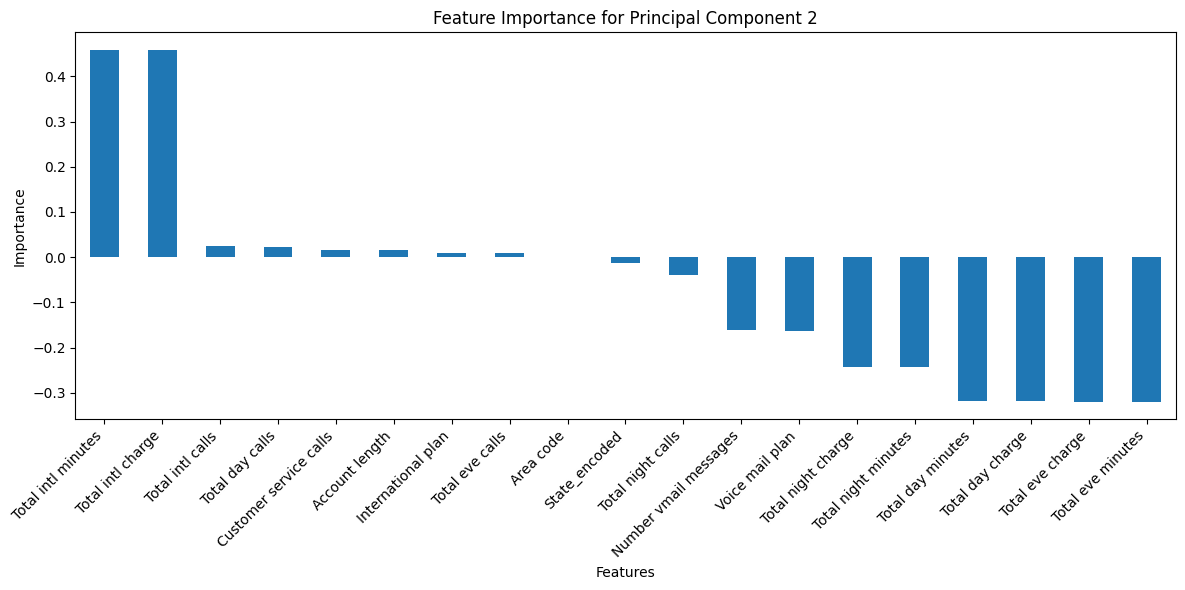


Feature Importances for Principal Component 2:
Total intl minutes        0.46
Total intl charge         0.46
Total intl calls          0.02
Total day calls           0.02
Customer service calls    0.02
Account length            0.01
International plan        0.01
Total eve calls           0.01
Area code                 0.00
State_encoded            -0.01
Total night calls        -0.04
Number vmail messages    -0.16
Voice mail plan          -0.16
Total night charge       -0.24
Total night minutes      -0.24
Total day minutes        -0.32
Total day charge         -0.32
Total eve charge         -0.32
Total eve minutes        -0.32
Name: 1, dtype: float64


In [ ]:
# prompt: add a bar chart every feature importance with each component and print them in a table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code) ...


# Assuming pca_feature_importance is defined from the previous code

# Create a table of feature importances for each component
feature_importance_table = pd.DataFrame(pca.components_, columns=X.columns)

# Display the table
print("Feature Importances for Each Principal Component:")
print(feature_importance_table)


# Bar charts for each component with feature importances in a table
for i in range(feature_importance_table.shape[0]):
    plt.figure(figsize=(12, 6))
    feature_importance_table.iloc[i].sort_values(ascending=False).plot(kind='bar')
    plt.title(f"Feature Importance for Principal Component {i + 1}")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    #Print the feature importances in a tabular format for the current component
    print(f"\nFeature Importances for Principal Component {i+1}:")
    print(feature_importance_table.iloc[i].sort_values(ascending=False).round(2))

##Interpretations :
* Principal Component 1 (PC1):

PC1 captures variance driven exclusively by the Area Code, as it \is highly dominated by this feature with a feature importance of 1.0, while all other features contribute negligibly.
* Principal Component 2 (PC2):

Positive Contributions:
1. Total Intl Minutes, Total Intl Charge (0.46): High importance here reflects international call behaviors.

Negative Contributions:
1. Total Eve/Day Minutes, Charges (-0.32): Customers with high evening or day usage are linked to the negative axis.
2. Total Night Minutes/Charges (-0.24): Reflects reduced variance for nighttime usage.

---

* Therefore, we have four apparent groups:
1. High international usage
2. High daytime and evening call activity
3. Low overall usage
4. Customers clustered by geographical differences

Since the fourth group is not relevant to churning behavior (as Area Code is a categorical attribute and does not inherently describe customer usage behavior), we focus on the three remaining groups.

* These groups have the following possible churn reasons:

-High international usage: High costs, plan limitations, or not staying in the same country for long periods.

-High daytime and evening call activity: Overage fees, better unlimited plans, or poor customer service.

-Low overall usage: Overpaying for unused services or low need.


# Data Preparation

##Clean Data

###Missing Values

In [ ]:
nan_counts = df.isnull().sum()
nan_counts

Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
State_encoded             0
dtype: int64

* Our data is complete and does not contain any missing values.

In [ ]:
df

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             114        415                   0                1   
3329             106        408                   0                1   
3330              60        415                   0                0   
3331             159        415                   0                0   
3332             184        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7               3.11   
3329                 8.1              

###Outliers

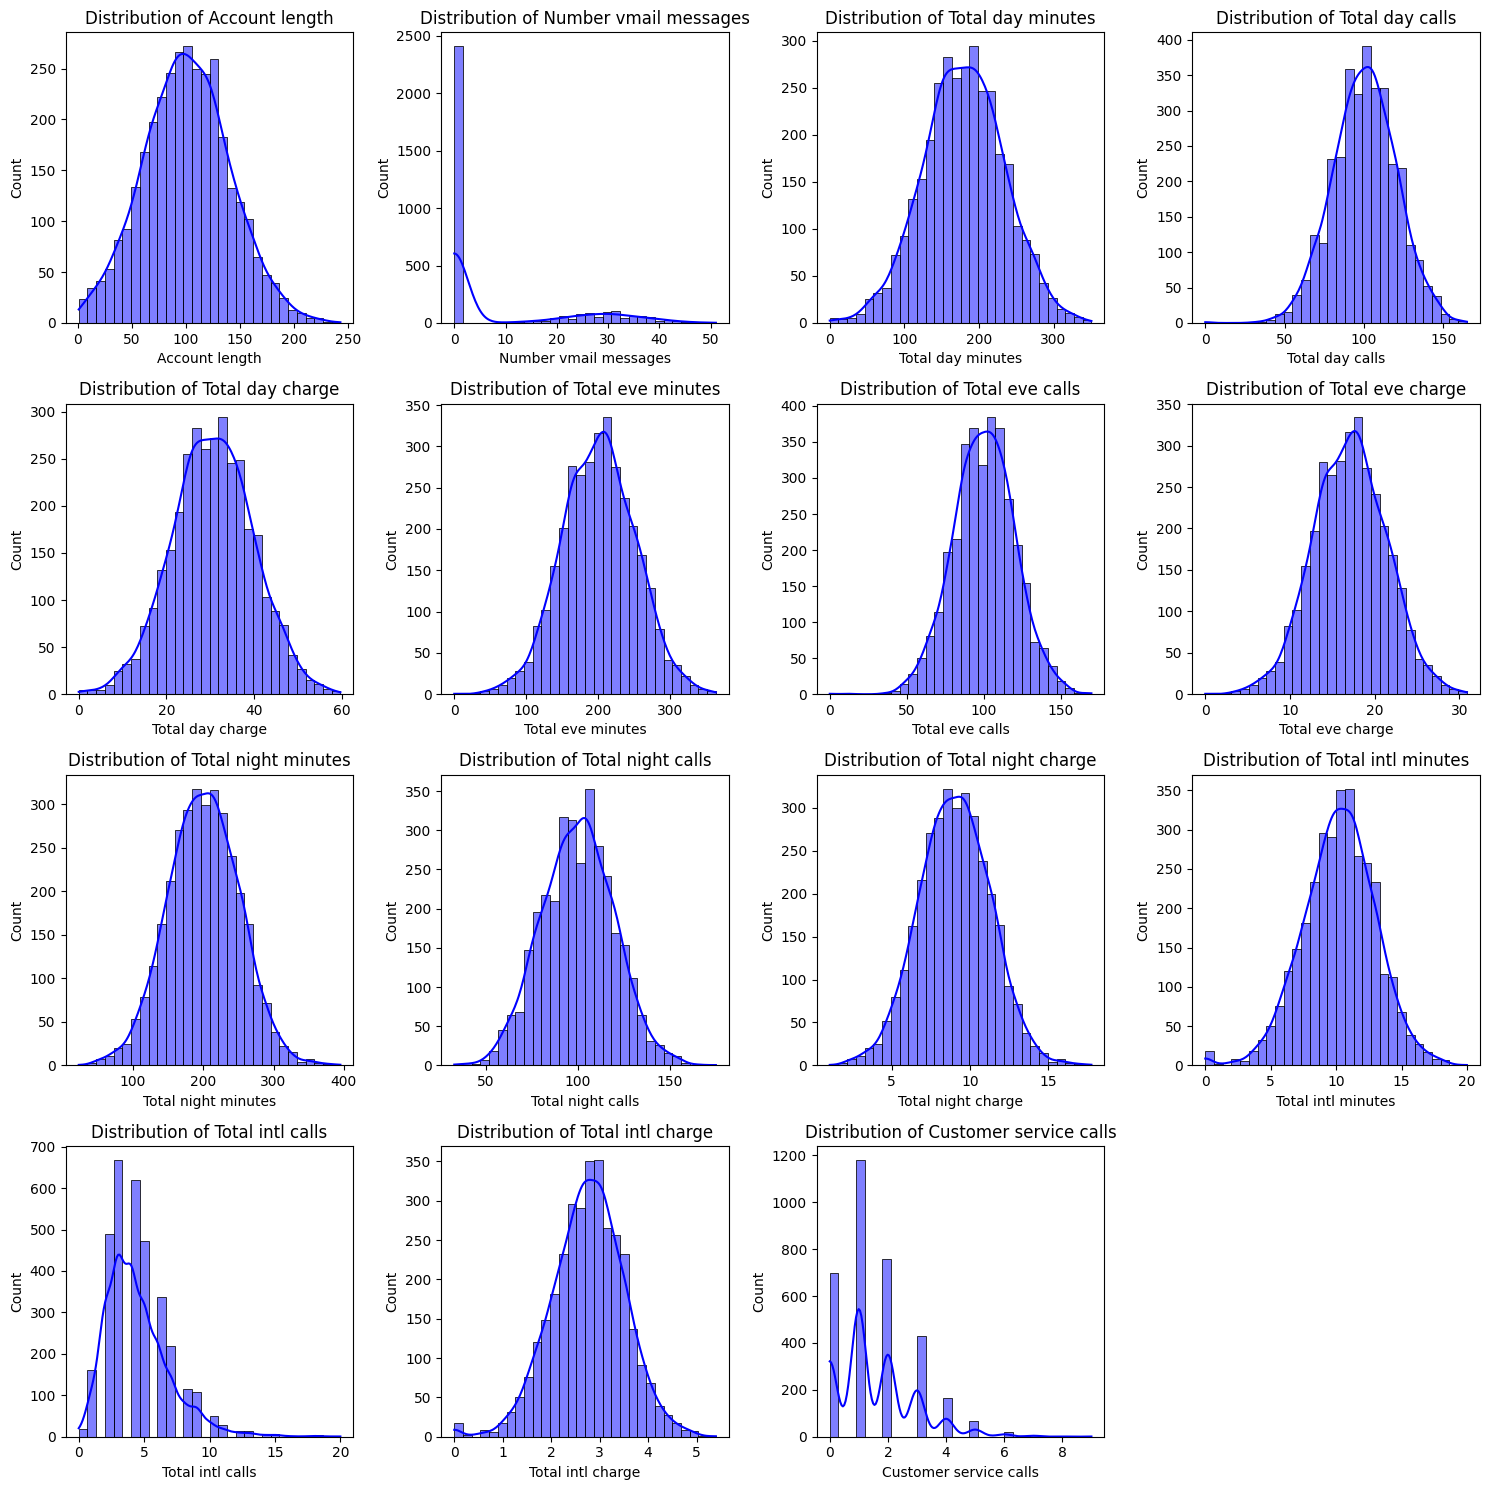

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'df' with your DataFrame variable name
# List of numerical columns to check for normal distribution
numerical_cols = [
    'Account length','Number vmail messages'	,
'Total day minutes'	,
'Total day calls'	,
'Total day charge'	,
'Total eve minutes',
'Total eve calls',
'Total eve charge',
'Total night minutes',
'Total night calls',
'Total night charge',
'Total intl minutes',
'Total intl calls',
'Total intl charge',
'Customer service calls'
]

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Change the grid size to 4 rows and 3 columns
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Z-Score relies on the standard deviation and mean, making it effective for normally distributed data.

In [ ]:
from scipy.stats import zscore
import numpy as np



# Calculate Z-Scores for numerical features
z_scores = np.abs(zscore(df[numerical_cols]))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Find rows with outliers
outliers = (z_scores > threshold).any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")
print(f"Percentage of outliers: {(outliers.sum() / len(df)) * 100:.2f}%")

# Optional: View outlier rows
outlier_rows = df[outliers]


Number of rows with outliers: 164
Percentage of outliers: 4.92%


Percentage of outliers in each column:
Account length: 0.21%
Number vmail messages: 0.09%
Total day minutes: 0.27%
Total day calls: 0.27%
Total day charge: 0.27%
Total eve minutes: 0.27%
Total eve calls: 0.21%
Total eve charge: 0.27%
Total night minutes: 0.33%
Total night calls: 0.18%
Total night charge: 0.33%
Total intl minutes: 0.66%
Total intl calls: 1.50%
Total intl charge: 0.66%
Customer service calls: 1.05%


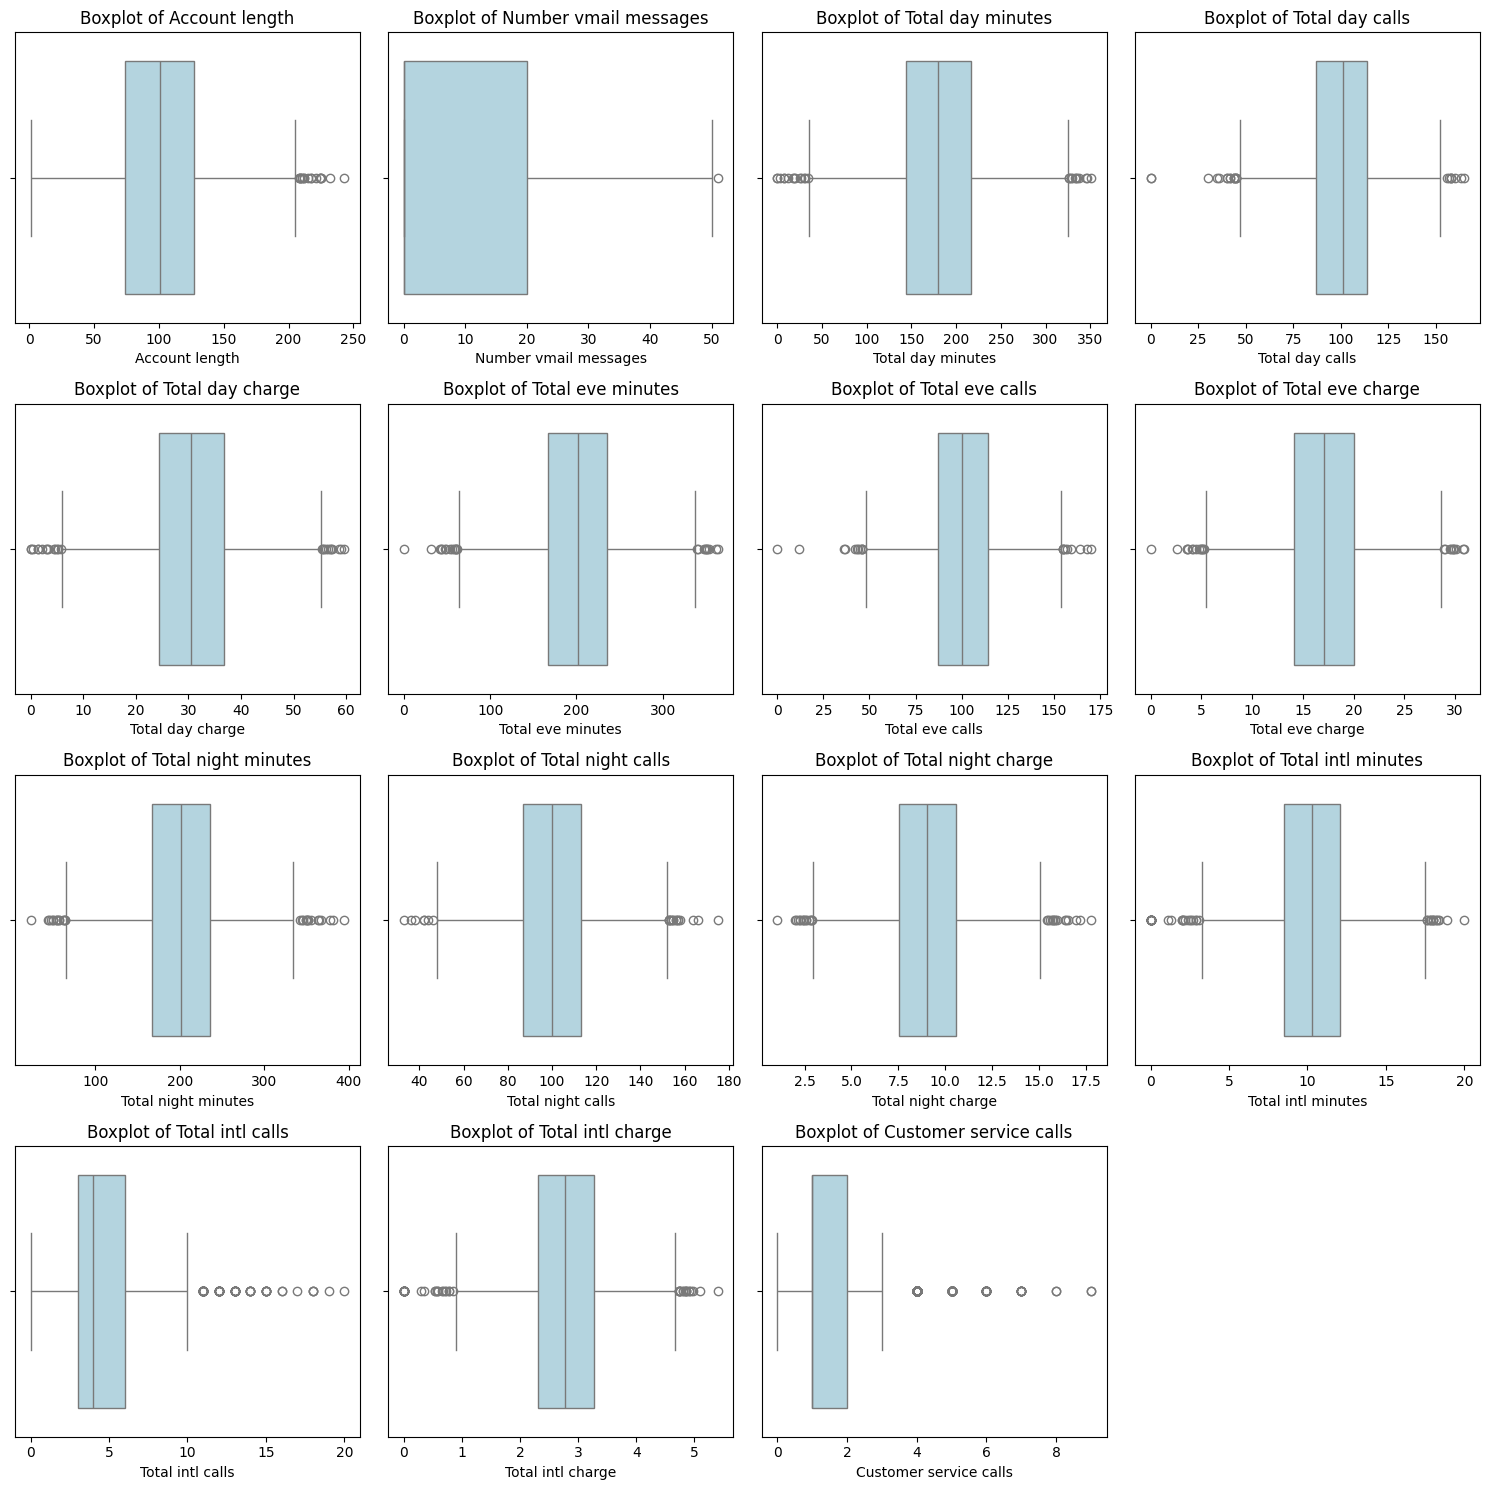

In [ ]:
# Calculate Z-Scores for numerical features
z_scores = np.abs(zscore(df[numerical_cols]))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Calculate the percentage of outliers for each column
outlier_percentages = (outliers.sum(axis=0) / len(df)) * 100

# Print outlier percentages
print("Percentage of outliers in each column:")
for col, perc in zip(numerical_cols, outlier_percentages):
    print(f"{col}: {perc:.2f}%")

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Comparison of Outliers' Mean vs Normal Data Mean:

Account length:
  - Outliers' Mean: 227.71
  - Normal Data Mean: 100.80

Number vmail messages:
  - Outliers' Mean: 50.33
  - Normal Data Mean: 8.06

Total day minutes:
  - Outliers' Mean: 119.30
  - Normal Data Mean: 179.94

Total day calls:
  - Outliers' Mean: 56.56
  - Normal Data Mean: 100.55

Total day charge:
  - Outliers' Mean: 20.28
  - Normal Data Mean: 30.59

Total eve minutes:
  - Outliers' Mean: 143.07
  - Normal Data Mean: 201.14

Total eve calls:
  - Outliers' Mean: 83.86
  - Normal Data Mean: 100.15

Total eve charge:
  - Outliers' Mean: 12.16
  - Normal Data Mean: 17.10

Total night minutes:
  - Outliers' Mean: 251.41
  - Normal Data Mean: 200.70

Total night calls:
  - Outliers' Mean: 102.00
  - Normal Data Mean: 100.10

Total night charge:
  - Outliers' Mean: 11.31
  - Normal Data Mean: 9.03

Total intl minutes:
  - Outliers' Mean: 1.88
  - Normal Data Mean: 10.29

Total intl calls:
  - Outliers' Mean: 13.86
  - Norma

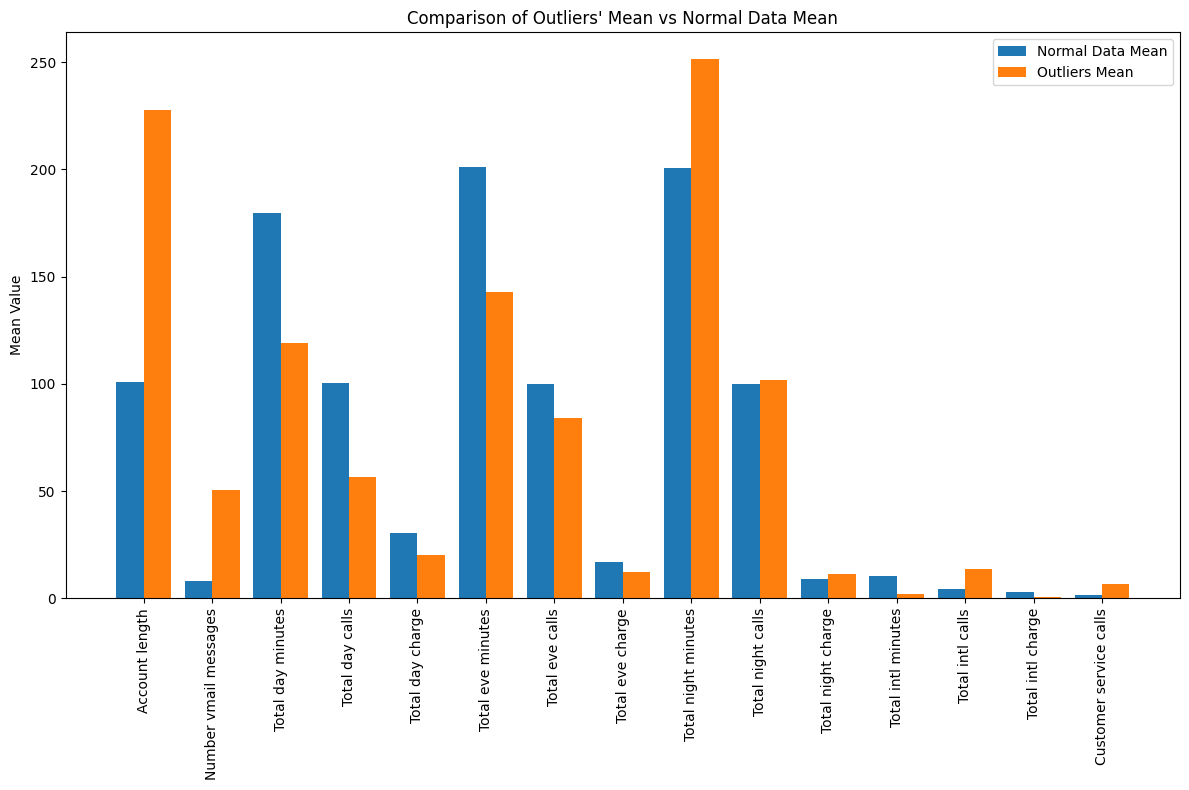

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming df is your DataFrame and numerical_cols are defined
numerical_cols = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Step 1: Initialize dictionaries for means
outliers_means = {}
normal_means = {}

print("Comparison of Outliers' Mean vs Normal Data Mean:\n")

# Step 2: Process each column individually
for col in numerical_cols:
    # Calculate Z-scores for the specific column
    col_z_scores = zscore(df[col])  # Z-scores for the current column

    # Identify outliers and normal data
    outliers_data = df[col][np.abs(col_z_scores) > 3]  # Outliers
    normal_data = df[col][np.abs(col_z_scores) <= 3]   # Normal values

    # Calculate means
    outliers_mean = outliers_data.mean()
    normal_mean = normal_data.mean()

    # Store the means
    outliers_means[col] = outliers_mean
    normal_means[col] = normal_mean

    # Print results
    print(f"{col}:")
    print(f"  - Outliers' Mean: {outliers_mean:.2f}")
    print(f"  - Normal Data Mean: {normal_mean:.2f}\n")

# Step 3: Plot comparison using a bar chart
plt.figure(figsize=(12, 8))
x = np.arange(len(numerical_cols))

# Bar plot of normal mean and outlier mean
plt.bar(x - 0.2, list(normal_means.values()), width=0.4, label='Normal Data Mean')
plt.bar(x + 0.2, list(outliers_means.values()), width=0.4, label='Outliers Mean')

plt.xticks(x, numerical_cols, rotation=90)
plt.ylabel("Mean Value")
plt.title("Comparison of Outliers' Mean vs Normal Data Mean")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-43-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')
<ipython-input-43-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')
<ipython-input-43-69dafbc7067f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')


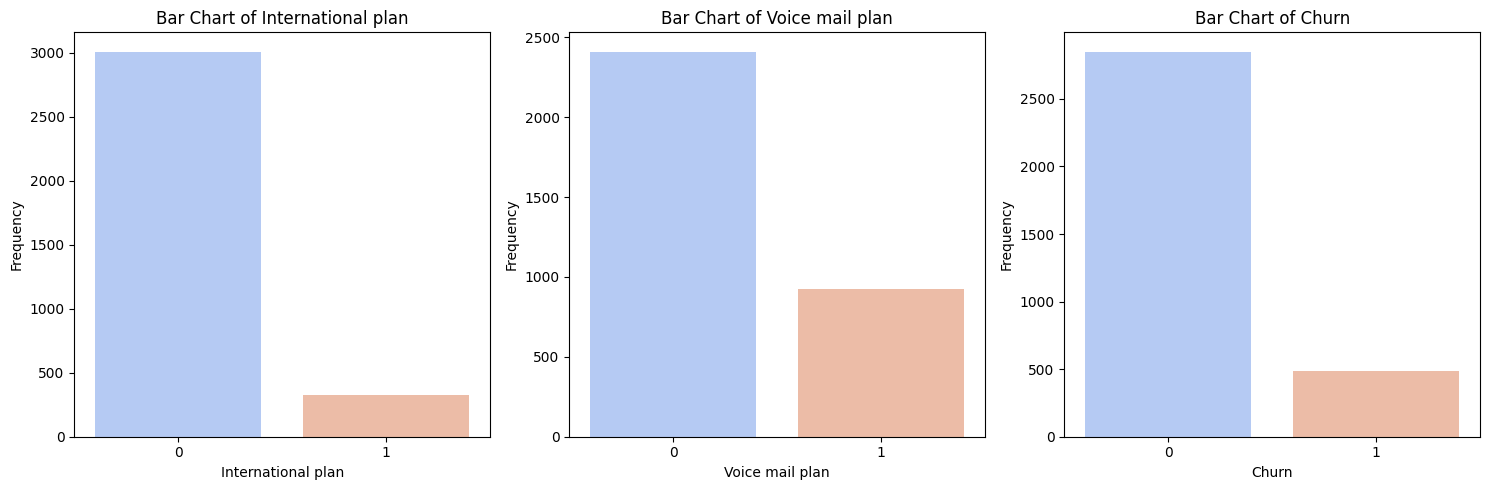

In [ ]:
categorical_cols = ['International plan', 'Voice mail plan', 'Churn']

# Plot bar charts for each categorical feature
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Cap outliers above the 99th percentile for each numerical column
for col in numerical_cols:
    # Calculate the 99th percentile
    upper_limit = np.percentile(df[col], 99)

    # Cap values above the 99th percentile
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Confirm that outliers have been capped
print("Outliers above the 99th percentile have been capped.")


Outliers above the 99th percentile have been capped.


In [ ]:
df

Account length  Area code  International plan  Voice mail plan  \
0              128.0        415                   0                1   
1              107.0        415                   0                1   
2              137.0        415                   0                0   
3               84.0        408                   1                0   
4               75.0        415                   1                0   
...              ...        ...                 ...              ...   
3328           114.0        415                   0                1   
3329           106.0        408                   0                1   
3330            60.0        415                   0                0   
3331           159.0        415                   0                0   
3332           184.0        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                      25.0              265.1            110.0   
1                      26.0              161.6            123.0   
2                       0.0              243.4            114.0   
3                       0.0              299.4             71.0   
4                       0.0              166.7            113.0   
...                     ...                ...              ...   
3328                   26.0              137.1             88.0   
3329                   29.0               83.6            131.0   
3330                    0.0              193.9            118.0   
3331                    0.0              169.8            114.0   
3332                    0.0              213.8            105.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4             99.0             16.78   
1                27.47              195.5            103.0             16.62   
2                41.38              121.2            110.0             10.30   
3                50.90               61.9             88.0              5.26   
4                28.34              148.3            122.0             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7            125.0             13.23   
3329             14.21              203.9            131.0             17.33   
3330             32.96               85.0            110.0              7.23   
3331             28.87              197.7            105.0             16.80   
3332             36.35              159.6             84.0             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7               91.0               11.01   
1                   254.4              103.0               11.45   
2                   162.6              104.0                7.32   
3                   196.9               89.0                8.86   
4                   186.9              121.0                8.41   
...                   ...                ...                 ...   
3328                247.6               94.0               11.14   
3329                229.5               73.0               10.33   
3330                210.1              134.0                9.45   
3331                193.7               82.0                8.72   
3332                139.2              137.0                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0               3.0               2.70   
1                   13.7               3.0               3.70   
2                   12.2               5.0               3.29   
3                    6.6               7.0               1.78   
4                   10.1               3.0               2.73   
...                  ...               ...                ...   
3328                11.5               7.0               3.11   
3329                 8.1              

##Feature Engeneering

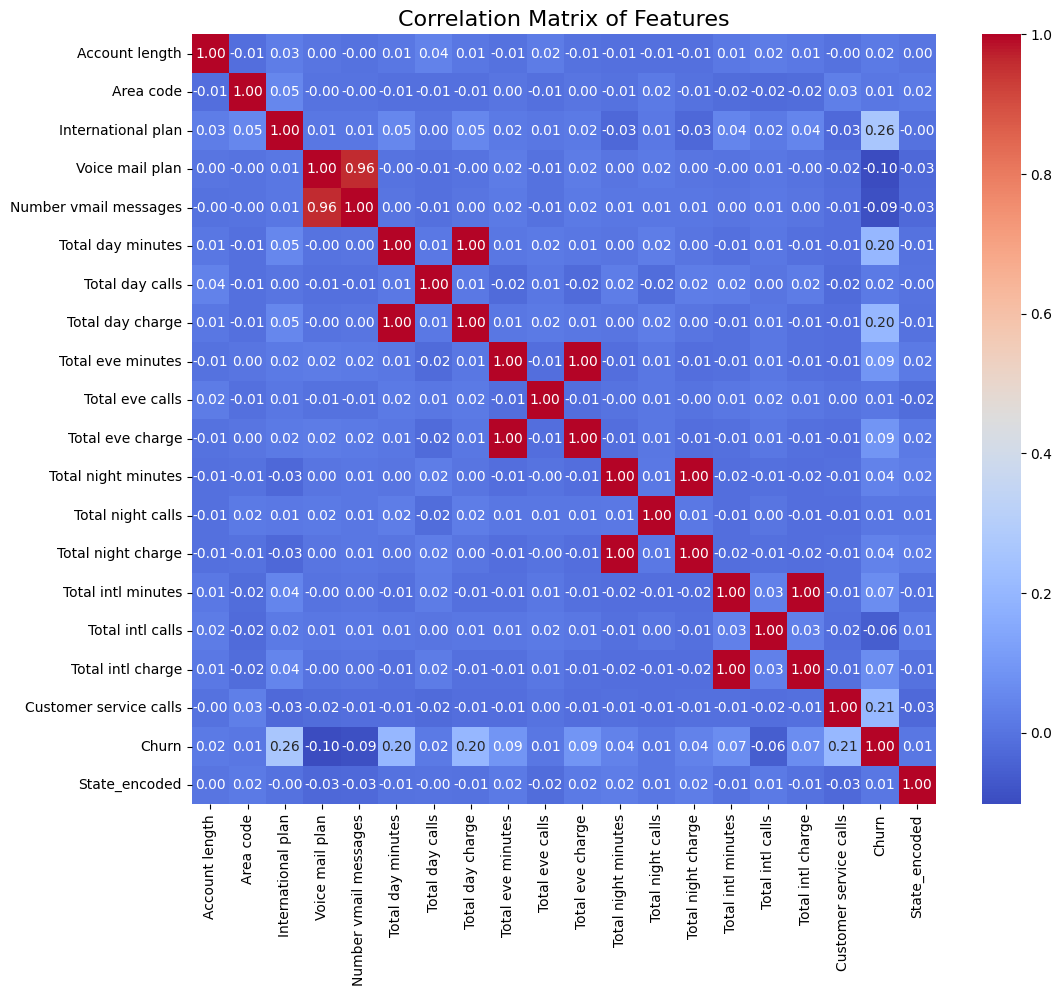

In [ ]:
# prompt: correlation heatmap

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:58:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


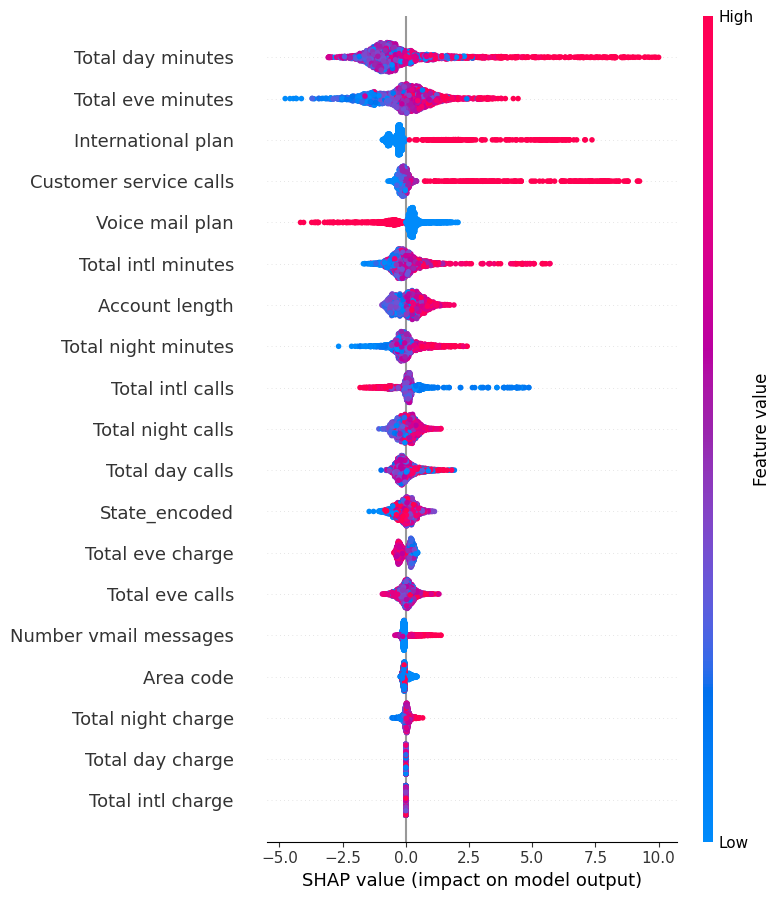

Feature  Importance
5        Total day minutes    1.271968
8        Total eve minutes    0.833587
2       International plan    0.633815
17  Customer service calls    0.526606
3          Voice mail plan    0.468749
14      Total intl minutes    0.447429
0           Account length    0.421636
11     Total night minutes    0.369272
15        Total intl calls    0.362191
12       Total night calls    0.287055
6          Total day calls    0.281400
18           State_encoded    0.272706
10        Total eve charge    0.228226
9          Total eve calls    0.210095
4    Number vmail messages    0.138632
1                Area code    0.105295
13      Total night charge    0.086156
7         Total day charge    0.000000
16       Total intl charge    0.000000

In [ ]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the data into train and test sets
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model (for SHAP compatibility)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)

# Get mean absolute SHAP values for feature importance ranking
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
shap_importance.head(19)


* The top ten most important features based on SHAP values are Total day minutes, Total eve minutes, International plan, Customer service calls, Voice mail plan, Total intl minutes, Account length, Total night minutes, Total intl calls, and Total night calls.

In [ ]:
# Retain the top features based on SHAP importance
selected_features = ['Total day minutes', 'Total eve minutes', 'International plan',
                     'Customer service calls', 'Voice mail plan', 'Total intl minutes',
                     'Total night minutes','Account length',
                     'Total intl calls','Total night calls']

# Update the feature set
X_selected = X[selected_features]

print("Selected Features:")
print(X_selected.head())


Selected Features:
   Total day minutes  Total eve minutes  International plan  \
0              265.1              197.4                   0   
1              161.6              195.5                   0   
2              243.4              121.2                   0   
3              299.4               61.9                   1   
4              166.7              148.3                   1   

   Customer service calls  Voice mail plan  Total intl minutes  \
0                     1.0                1                10.0   
1                     1.0                1                13.7   
2                     0.0                0                12.2   
3                     2.0                0                 6.6   
4                     3.0                0                10.1   

   Total night minutes  Account length  Total intl calls  Total night calls  
0                244.7           128.0               3.0               91.0  
1                254.4           107.0           

*  We retained only the top 10 features and updated our dataset accordingly.

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# Train a model with all features
model_all = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
auc_all = roc_auc_score(y_test, model_all.predict_proba(X_test)[:, 1])

# Train a model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)
auc_selected = roc_auc_score(y_test, model_selected.predict_proba(X_test_selected)[:, 1])

# Compare performance
print(f"AUC with all features: {auc_all:.4f}")
print(f"AUC with selected features: {auc_selected:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC with all features: 0.8851
AUC with selected features: 0.8906


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


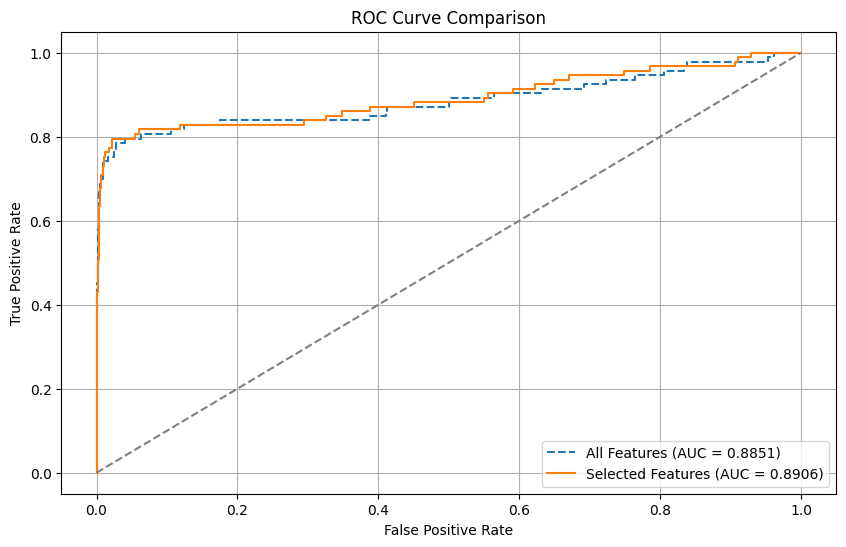

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for ROC curve
y_prob_all = model_all.predict_proba(X_test)[:, 1]
y_prob_selected = model_selected.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curve
fpr_all, tpr_all, _ = roc_curve(y_test, y_prob_all)
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_prob_selected)

# Calculate AUC
auc_all = auc(fpr_all, tpr_all)
auc_selected = auc(fpr_selected, tpr_selected)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_all, tpr_all, label=f'All Features (AUC = {auc_all:.4f})', linestyle='--')
plt.plot(fpr_selected, tpr_selected, label=f'Selected Features (AUC = {auc_selected:.4f})', linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)

# Add labels, title, and legend
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


* We observed no difference between the two curves, indicating that the removed features have no impact on churn behavior.

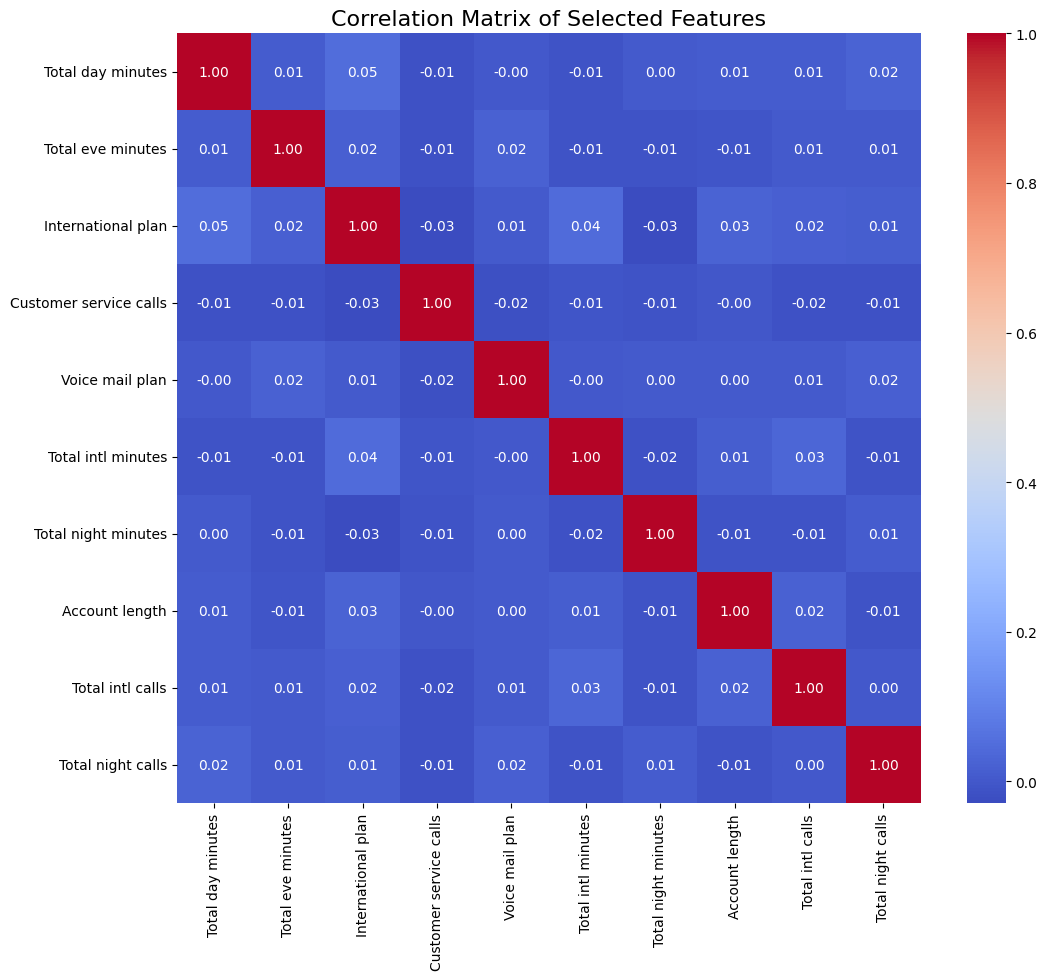

In [ ]:
# prompt: correlation matrix of X_selected

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_selected is defined from the previous code

plt.figure(figsize=(12, 10))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [ ]:
df_copy = X_selected.copy()

In [ ]:
df_copy

Total day minutes  Total eve minutes  International plan  \
0                 265.1              197.4                   0   
1                 161.6              195.5                   0   
2                 243.4              121.2                   0   
3                 299.4               61.9                   1   
4                 166.7              148.3                   1   
...                 ...                ...                 ...   
3328              137.1              155.7                   0   
3329               83.6              203.9                   0   
3330              193.9               85.0                   0   
3331              169.8              197.7                   0   
3332              213.8              159.6                   1   

      Customer service calls  Voice mail plan  Total intl minutes  \
0                        1.0                1                10.0   
1                        1.0                1                13.7   
2                        0.0                0                12.2   
3                        2.0                0                 6.6   
4                        3.0                0                10.1   
...                      ...              ...                 ...   
3328                     2.0                1                11.5   
3329                     1.0                1                 8.1   
3330                     3.0                0                13.2   
3331                     1.0                0                11.6   
3332                     2.0                0                 5.0   

      Total night minutes  Account length  Total intl calls  Total night calls  
0                   244.7           128.0               3.0               91.0  
1                   254.4           107.0               3.0              103.0  
2                   162.6           137.0               5.0              104.0  
3                   196.9            84.0               7.0               89.0  
4                   186.9            75.0               3.0              121.0  
...                   ...             ...               ...                ...  
3328                247.6           114.0               7.0               94.0  
3329                229.5           106.0               3.0               73.0  
3330                210.1            60.0               8.0              134.0  
3331                193.7           159.0               4.0               82.0  
3332                139.2           184.0              10.0              137.0  

[3333 rows x 10 columns]

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split

# Import SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)

# Splitting data into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution before balancing
print("Class distribution before SMOTE-ENN:")
print(f"Train: {Counter(y_train)}")
print(f"Test: {Counter(y_test)}")

# Apply SMOTE-ENN on the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_selected, y_train)

# Check class distribution after SMOTE-ENN
print("\nClass distribution after SMOTE-ENN:")
print(Counter(y_resampled))

# Display shapes
print("\nShape of X_train after SMOTE-ENN:", X_resampled.shape)
print("Shape of y_train after SMOTE-ENN:", y_resampled.shape)

# Train XGBoost model on SMOTE-ENN balanced data
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Initialize the XGBoost model
model_smote_enn = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model_smote_enn.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_proba = model_smote_enn.predict_proba(X_test_selected)[:, 1]
auc_smote_enn = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"\nAUC after SMOTE-ENN: {auc_smote_enn:.4f}")


Class distribution before SMOTE-ENN:
Train: Counter({0: 2280, 1: 386})
Test: Counter({0: 570, 1: 97})

Class distribution after SMOTE-ENN:
Counter({1: 2036, 0: 1346})

Shape of X_train after SMOTE-ENN: (3382, 10)
Shape of y_train after SMOTE-ENN: (3382,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida


AUC after SMOTE-ENN: 0.9058


* To address the class imbalance, we applied SMOTE-ENN, which corrected the difference between the two classes. Before applying SMOTE-ENN, the class distribution in the training set was 0: 2280 and 1: 386, while in the test set it was 0: 570 and 1: 97. After applying SMOTE-ENN, the class distribution was balanced to 1: 2036 and 0: 1346. The final shape of the training data is (3382, 10) for X_train and (3382,) for y_train .

# Modeling

###Select Modeling Techniques

###Build the Models

####Gradient Boosting

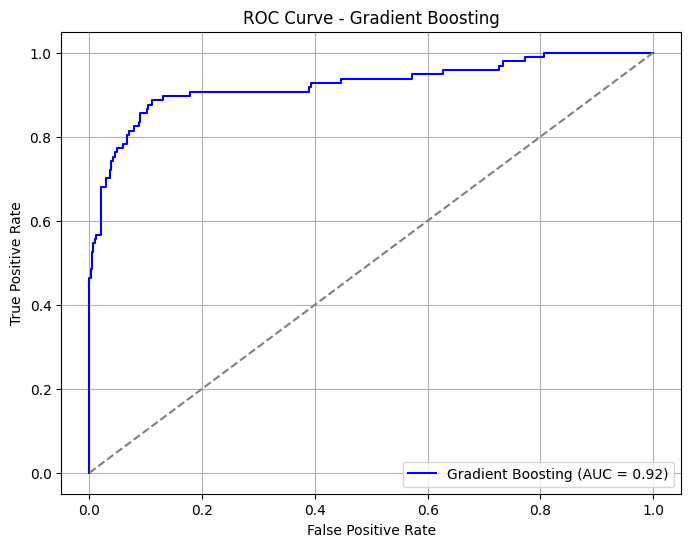

Gradient Boosting - Accuracy: 0.9190, F1 Score: 0.7353, AUC: 0.9243


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_resampled, y_resampled)

# Predict probabilities
y_pred_proba_gb = gb_model.predict_proba(X_test_selected)[:, 1]
y_pred_gb = gb_model.predict(X_test_selected)

# Calculate metrics
f1_gb = f1_score(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}, F1 Score: {f1_gb:.4f}, AUC: {roc_auc_gb:.4f}")


Confusion Matrix:
[[538  32]
 [ 22  75]]


<Figure size 800x600 with 0 Axes>

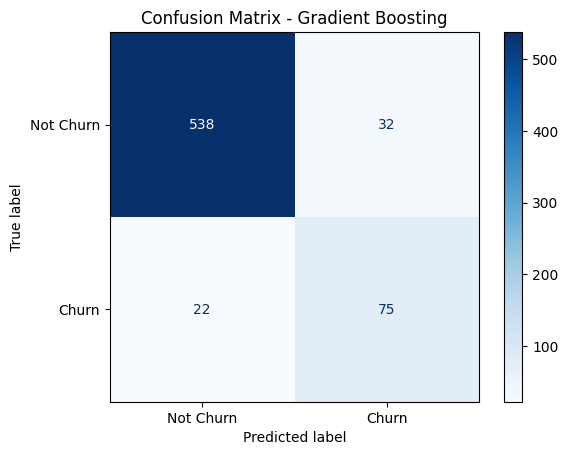

In [ ]:
from sklearn.metrics import (
    roc_curve, accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, precision_score, recall_score
)
cm = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.grid(False)
plt.show()

####Random Forest

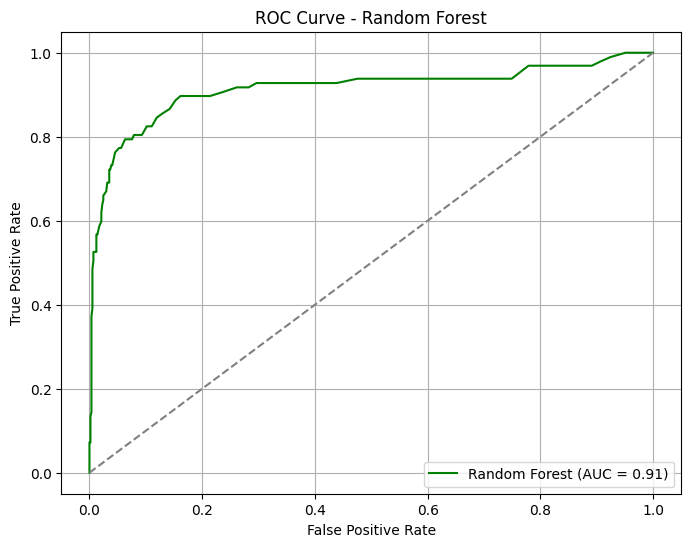

Random Forest - Accuracy: 0.9295, F1 Score: 0.7487, Precision: 0.7778, Recall: 0.7216, AUC: 0.9132

Confusion Matrix:
[[550  20]
 [ 27  70]]


<Figure size 800x600 with 0 Axes>

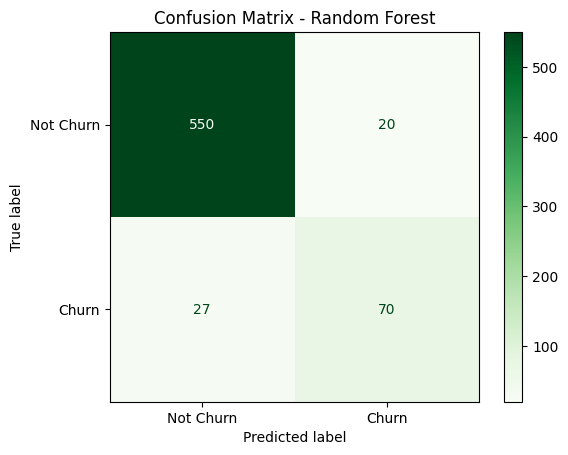

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate metrics
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, AUC: {roc_auc_rf:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"]).plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()


####AdaBoost

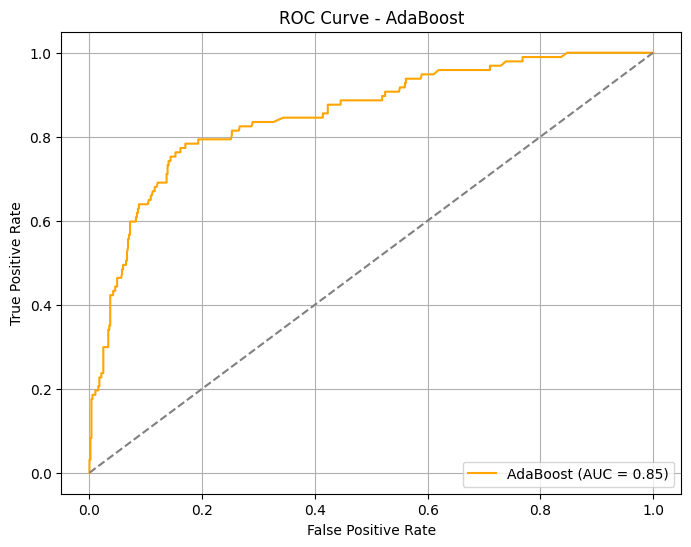

AdaBoost - Accuracy: 0.8231, F1 Score: 0.5630, Precision: 0.4393, Recall: 0.7835, AUC: 0.8532

Confusion Matrix:
[[473  97]
 [ 21  76]]


<Figure size 800x600 with 0 Axes>

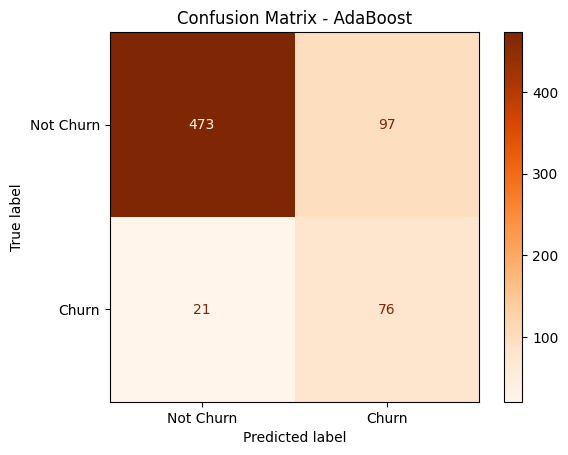

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    roc_curve, accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, precision_score, recall_score
)
import matplotlib.pyplot as plt

# AdaBoost Model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_ada = ada_model.predict_proba(X_test_selected)[:, 1]
y_pred_ada = ada_model.predict(X_test_selected)

# Calculate metrics
f1_ada = f1_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

# ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC = {roc_auc_ada:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"AdaBoost - Accuracy: {accuracy_ada:.4f}, F1 Score: {f1_ada:.4f}, Precision: {precision_ada:.4f}, Recall: {recall_ada:.4f}, AUC: {roc_auc_ada:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"]).plot(cmap='Oranges')
plt.title("Confusion Matrix - AdaBoost")
plt.grid(False)
plt.show()


####Neural Network

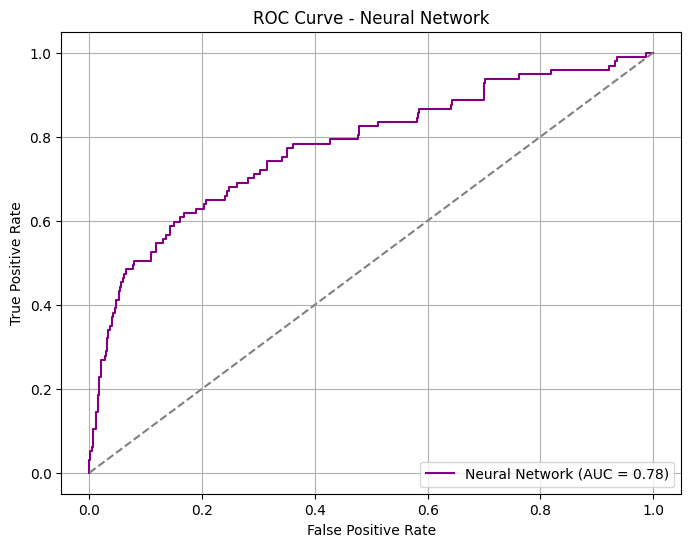

Neural Network - Accuracy: 0.7376, F1 Score: 0.4300, Precision: 0.3143, Recall: 0.6804, AUC: 0.7770

Confusion Matrix:
[[426 144]
 [ 31  66]]


<Figure size 800x600 with 0 Axes>

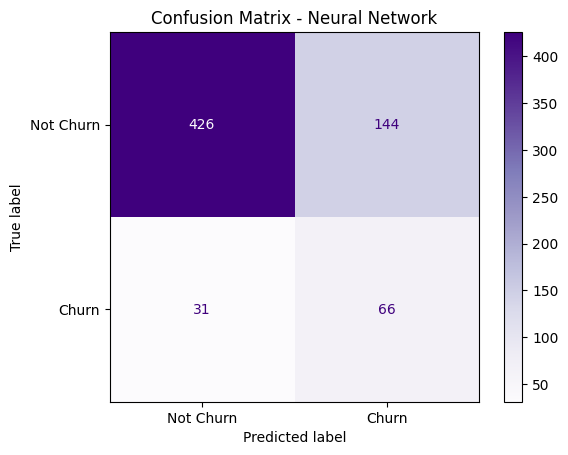

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    roc_curve, accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Neural Network Model
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_nn = nn_model.predict_proba(X_test_selected)[:, 1]
y_pred_nn = nn_model.predict(X_test_selected)

# Calculate metrics
f1_nn = f1_score(y_test, y_pred_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, F1 Score: {f1_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, AUC: {roc_auc_nn:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"]).plot(cmap='Purples')
plt.title("Confusion Matrix - Neural Network")
plt.grid(False)
plt.show()


####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_dt = dt_model.predict_proba(X_test_selected)[:, 1]
y_pred_dt = dt_model.predict(X_test_selected)


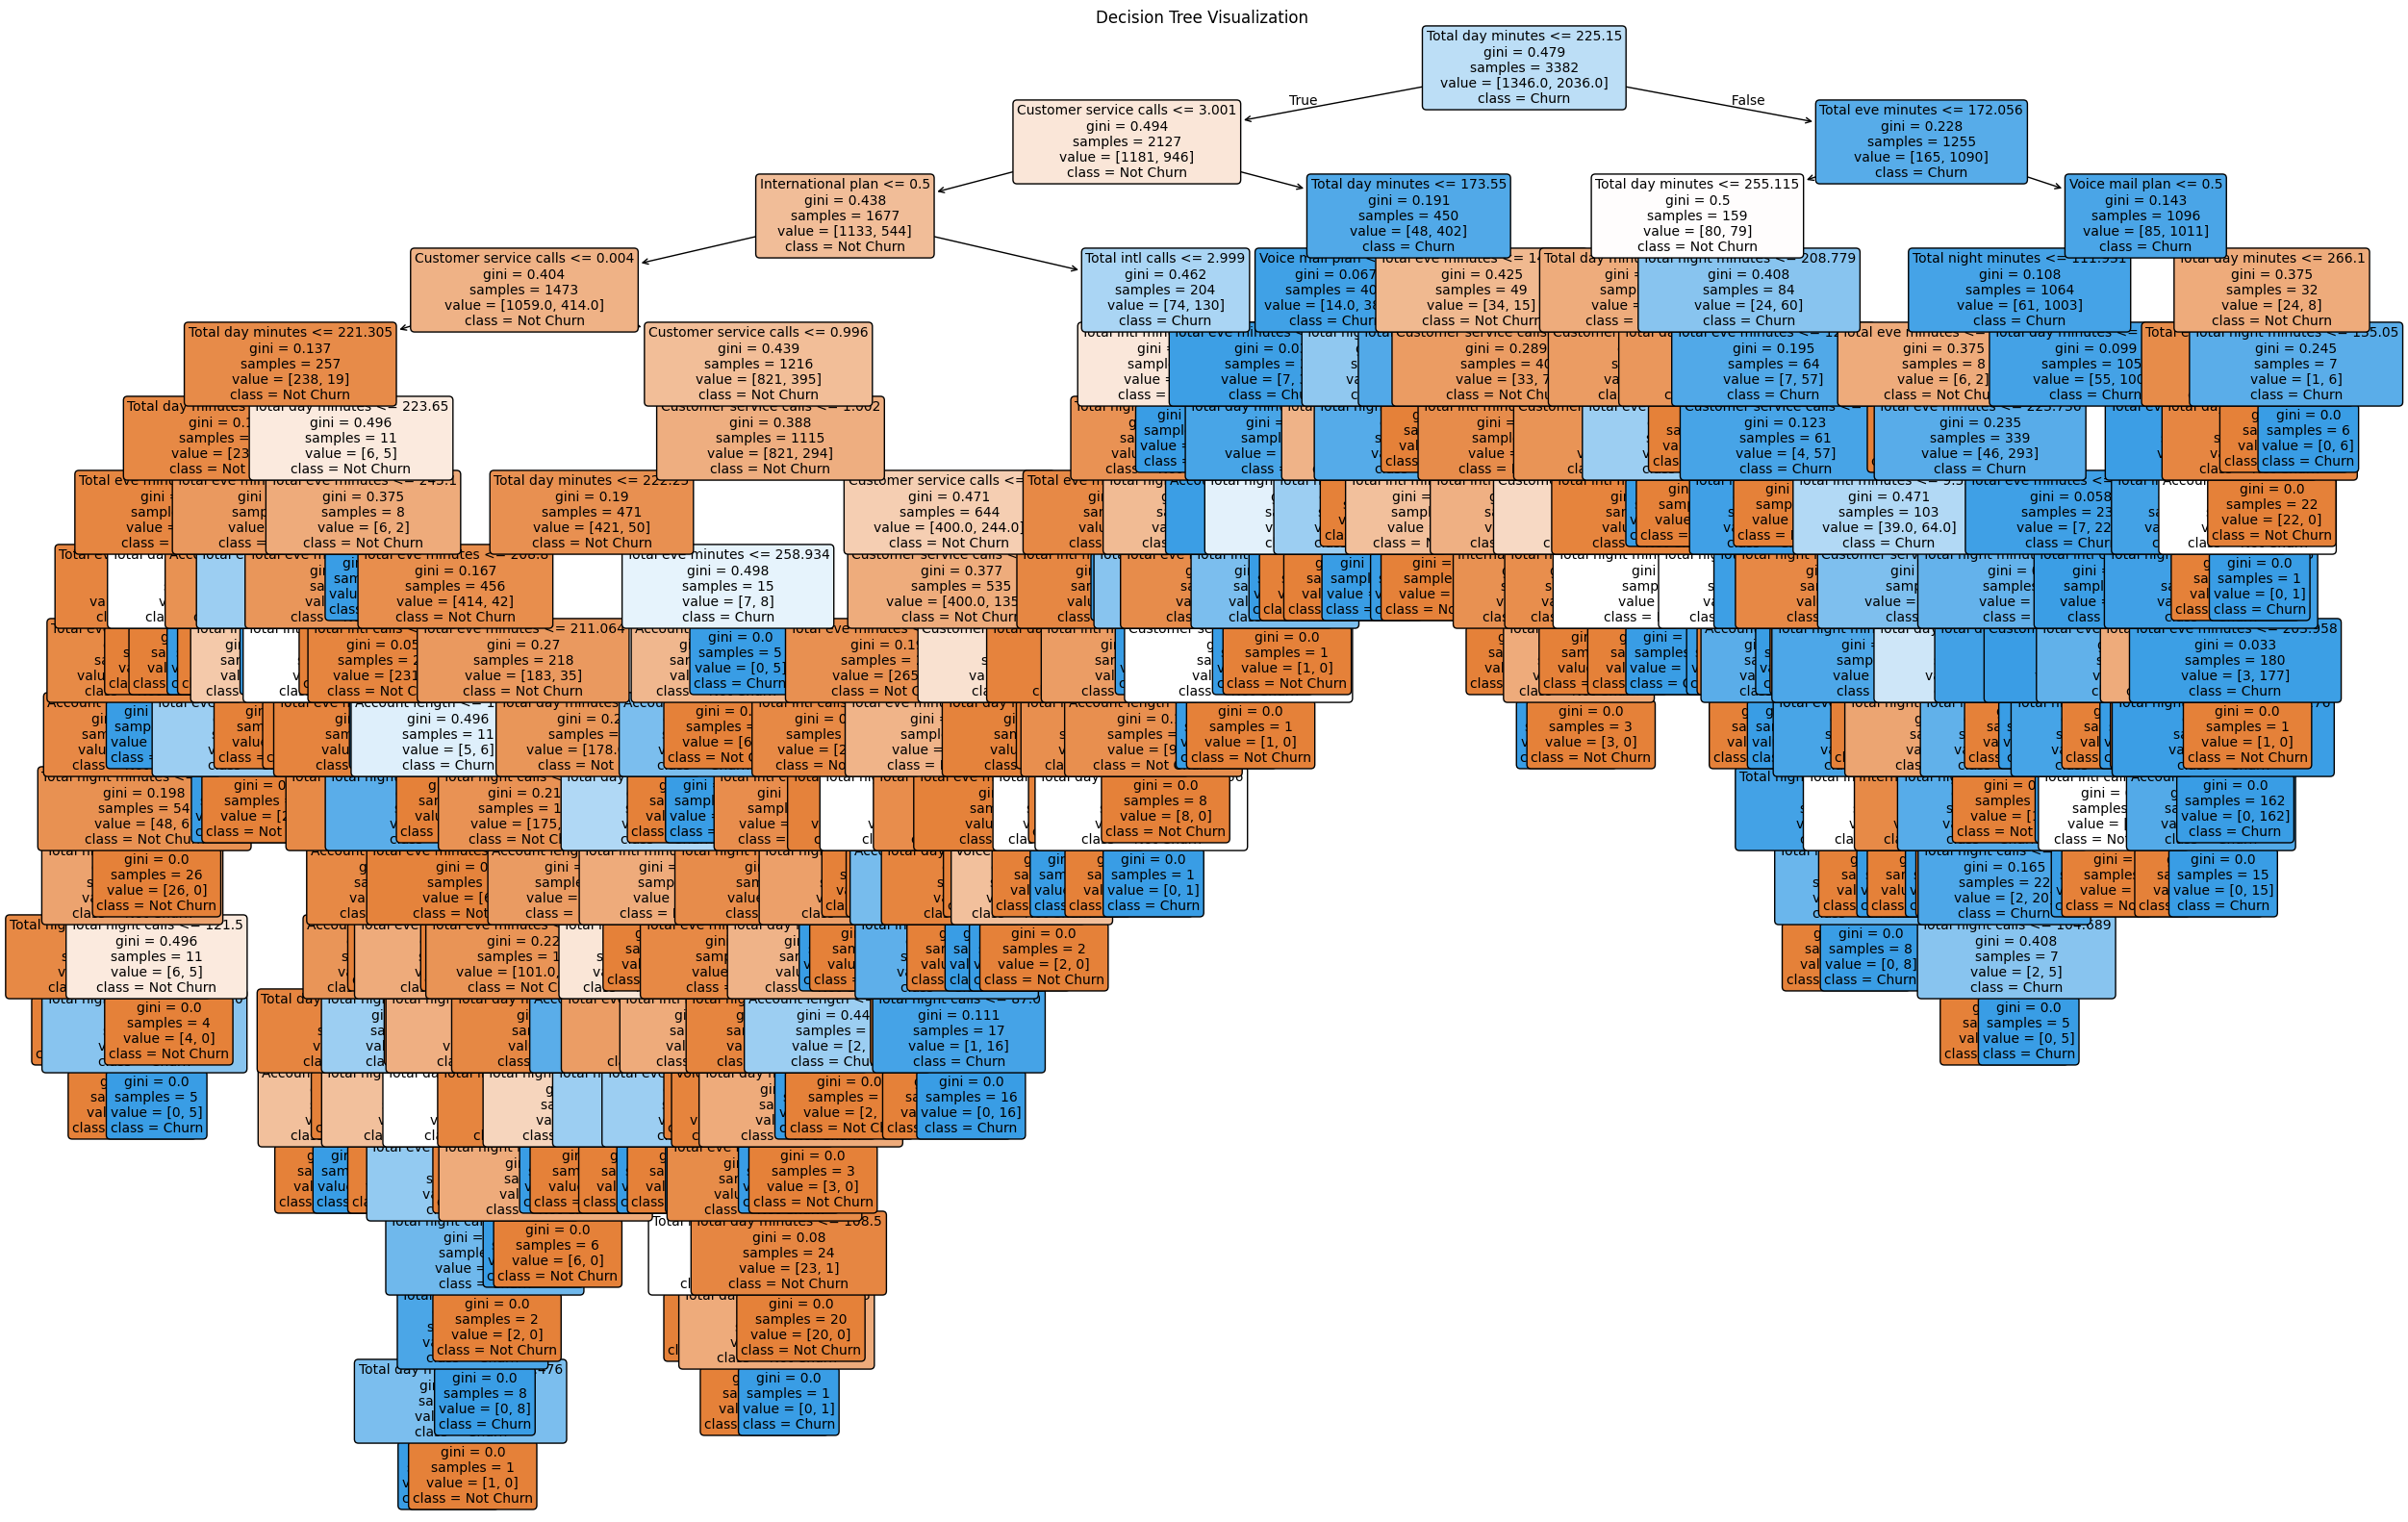

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot Decision Tree
plt.figure(figsize=(30, 20))  # Adjust the figure size for better readability
plot_tree(
    dt_model,
    feature_names=X_resampled.columns,  # Replace with feature names from your dataset
    class_names=['Not Churn', 'Churn'],  # Replace with class labels
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


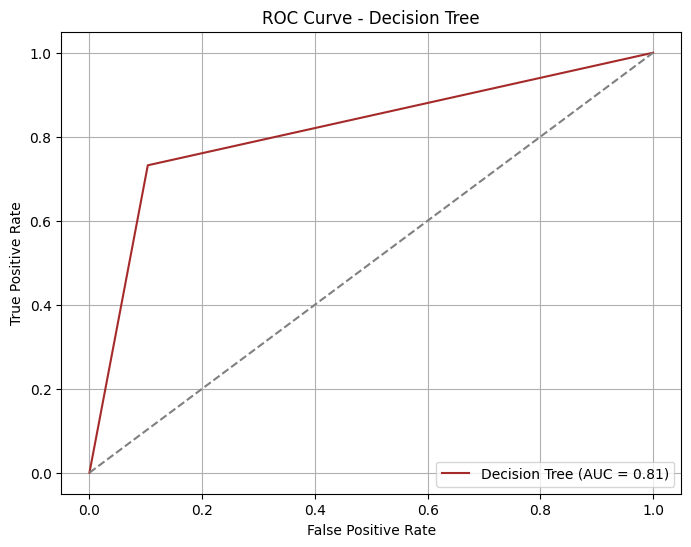

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color='brown')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate Metrics
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

# Print metrics
print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"AUC: {roc_auc_dt:.4f}")


Decision Tree Metrics:
Accuracy: 0.8726
F1 Score: 0.6256
Precision: 0.5462
Recall: 0.7320
AUC: 0.8142


<Figure size 800x600 with 0 Axes>

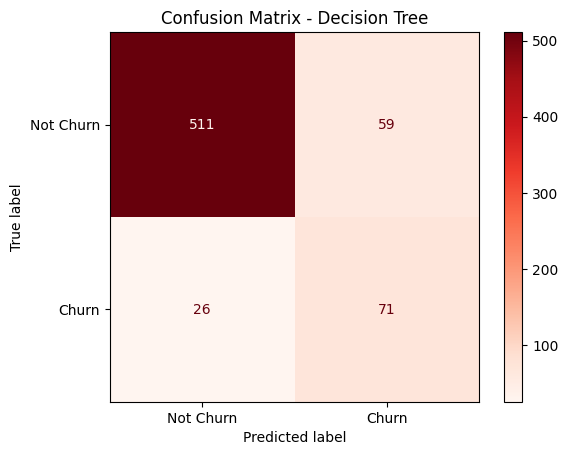

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Not Churn", "Churn"]).plot(cmap='Reds')
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_lr = lr_model.predict_proba(X_test_selected)[:, 1]
y_pred_lr = lr_model.predict(X_test_selected)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


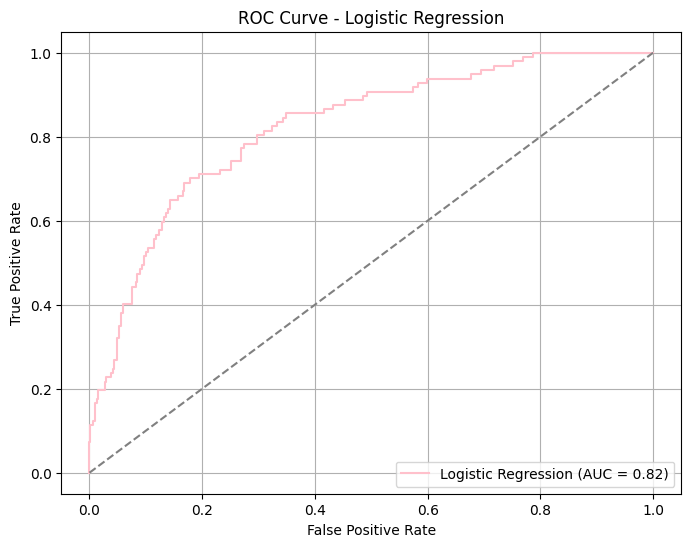

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate Metrics
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Print Metrics
print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"AUC: {roc_auc_lr:.4f}")


Logistic Regression Metrics:
Accuracy: 0.6747
F1 Score: 0.4334
Precision: 0.2902
Recall: 0.8557
AUC: 0.8235


<Figure size 800x600 with 0 Axes>

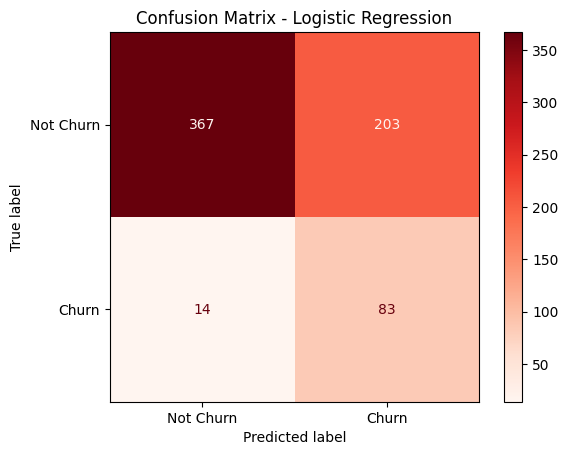

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Not Churn", "Churn"]).plot(cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()


####Support vector machines (SVM)

#####Linear SVM

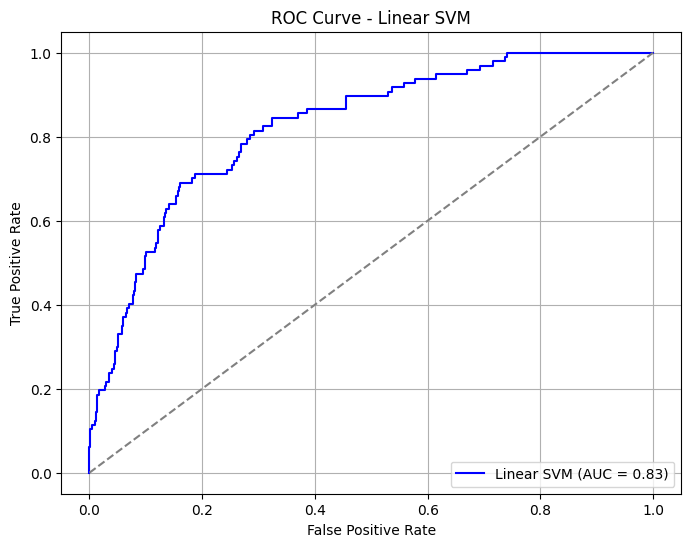

Linear SVM - Accuracy: 0.6777, F1 Score: 0.4327, AUC: 0.8265


In [ ]:
from sklearn.svm import SVC

# Linear SVM Model
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_resampled, y_resampled)

# Predict probabilities
y_pred_proba_svm_linear = svm_linear.predict_proba(X_test_selected)[:, 1]
y_pred_svm_linear = svm_linear.predict(X_test_selected)

# Calculate metrics
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
roc_auc_svm_linear = roc_auc_score(y_test, y_pred_proba_svm_linear)

# ROC Curve
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_proba_svm_linear)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (AUC = {roc_auc_svm_linear:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"Linear SVM - Accuracy: {accuracy_svm_linear:.4f}, F1 Score: {f1_svm_linear:.4f}, AUC: {roc_auc_svm_linear:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate Metrics
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
precision_svm_linear = precision_score(y_test, y_pred_svm_linear)
recall_svm_linear = recall_score(y_test, y_pred_svm_linear)

# Print Metrics
print(f"Linear SVM Metrics:")
print(f"Accuracy: {accuracy_svm_linear:.4f}")
print(f"F1 Score: {f1_svm_linear:.4f}")
print(f"Precision: {precision_svm_linear:.4f}")
print(f"Recall: {recall_svm_linear:.4f}")
print(f"AUC: {roc_auc_svm_linear:.4f}")


Linear SVM Metrics:
Accuracy: 0.6777
F1 Score: 0.4327
Precision: 0.2908
Recall: 0.8454
AUC: 0.8265


<Figure size 800x600 with 0 Axes>

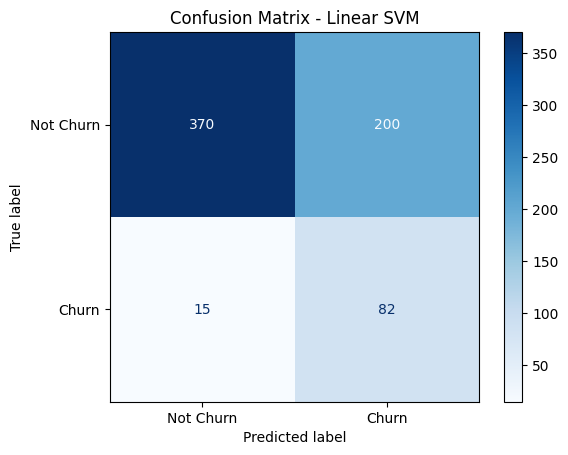

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_svm_linear, display_labels=["Not Churn", "Churn"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.grid(False)
plt.show()


#####Polynomial SVM

In [ ]:
from sklearn.svm import SVC

# Polynomial SVM Model
svm_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svm_poly.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_svm_poly = svm_poly.predict_proba(X_test_selected)[:, 1]
y_pred_svm_poly = svm_poly.predict(X_test_selected)


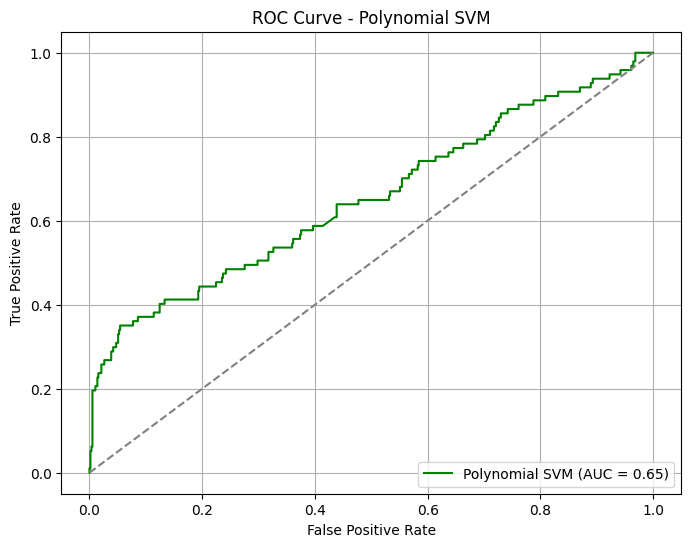

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC Curve
fpr_svm_poly, tpr_svm_poly, _ = roc_curve(y_test, y_pred_proba_svm_poly)
roc_auc_svm_poly = roc_auc_score(y_test, y_pred_proba_svm_poly)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_poly, tpr_svm_poly, label=f"Polynomial SVM (AUC = {roc_auc_svm_poly:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Polynomial SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate Metrics
f1_svm_poly = f1_score(y_test, y_pred_svm_poly)
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
precision_svm_poly = precision_score(y_test, y_pred_svm_poly)
recall_svm_poly = recall_score(y_test, y_pred_svm_poly)

# Print Metrics
print(f"Polynomial SVM Metrics:")
print(f"Accuracy: {accuracy_svm_poly:.4f}")
print(f"F1 Score: {f1_svm_poly:.4f}")
print(f"Precision: {precision_svm_poly:.4f}")
print(f"Recall: {recall_svm_poly:.4f}")
print(f"AUC: {roc_auc_svm_poly:.4f}")


Polynomial SVM Metrics:
Accuracy: 0.6627
F1 Score: 0.3034
Precision: 0.2168
Recall: 0.5052
AUC: 0.6526


<Figure size 800x600 with 0 Axes>

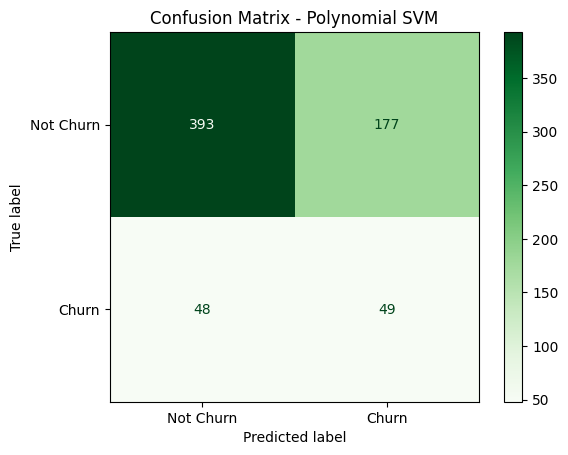

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm_svm_poly = confusion_matrix(y_test, y_pred_svm_poly)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_svm_poly, display_labels=["Not Churn", "Churn"]).plot(cmap='Greens')
plt.title("Confusion Matrix - Polynomial SVM")
plt.grid(False)
plt.show()


#####Sigmoid SVM

In [ ]:
from sklearn.svm import SVC

# Sigmoid SVM Model
svm_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
svm_sigmoid.fit(X_resampled, y_resampled)

# Predict probabilities and labels
y_pred_proba_svm_sigmoid = svm_sigmoid.predict_proba(X_test_selected)[:, 1]
y_pred_svm_sigmoid = svm_sigmoid.predict(X_test_selected)


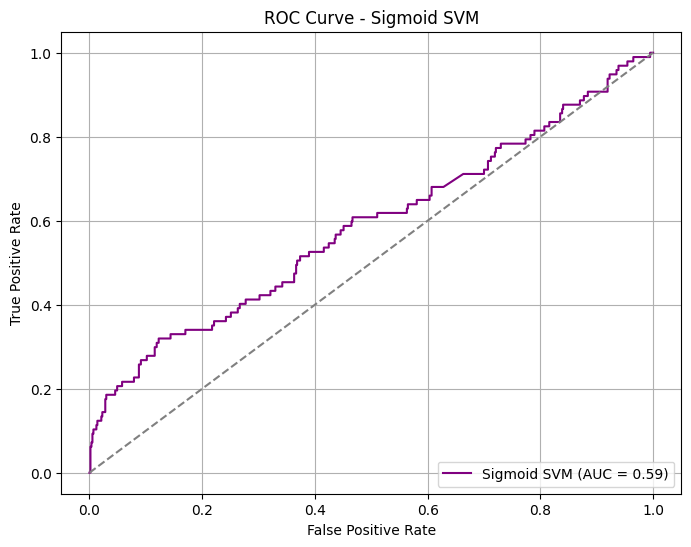

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC Curve
fpr_svm_sigmoid, tpr_svm_sigmoid, _ = roc_curve(y_test, y_pred_proba_svm_sigmoid)
roc_auc_svm_sigmoid = roc_auc_score(y_test, y_pred_proba_svm_sigmoid)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_sigmoid, tpr_svm_sigmoid, label=f"Sigmoid SVM (AUC = {roc_auc_svm_sigmoid:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sigmoid SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate Metrics
f1_svm_sigmoid = f1_score(y_test, y_pred_svm_sigmoid)
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid)
precision_svm_sigmoid = precision_score(y_test, y_pred_svm_sigmoid)
recall_svm_sigmoid = recall_score(y_test, y_pred_svm_sigmoid)

# Print Metrics
print(f"Sigmoid SVM Metrics:")
print(f"Accuracy: {accuracy_svm_sigmoid:.4f}")
print(f"F1 Score: {f1_svm_sigmoid:.4f}")
print(f"Precision: {precision_svm_sigmoid:.4f}")
print(f"Recall: {recall_svm_sigmoid:.4f}")
print(f"AUC: {roc_auc_svm_sigmoid:.4f}")


Sigmoid SVM Metrics:
Accuracy: 0.2759
F1 Score: 0.2095
Precision: 0.1245
Recall: 0.6598
AUC: 0.5851


<Figure size 800x600 with 0 Axes>

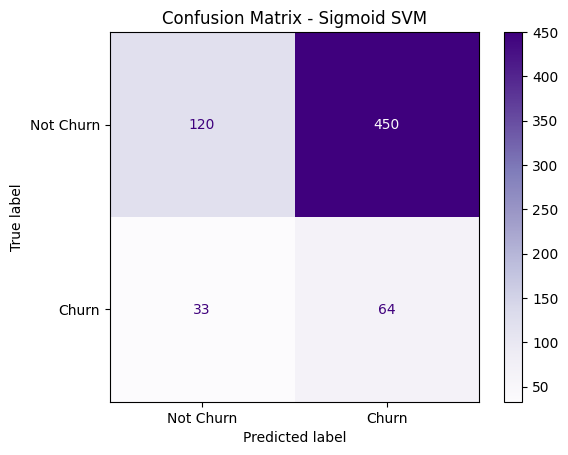

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_svm_sigmoid)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_svm_sigmoid, display_labels=["Not Churn", "Churn"]).plot(cmap='Purples')
plt.title("Confusion Matrix - Sigmoid SVM")
plt.grid(False)
plt.show()


#####Comparison of SVM Models

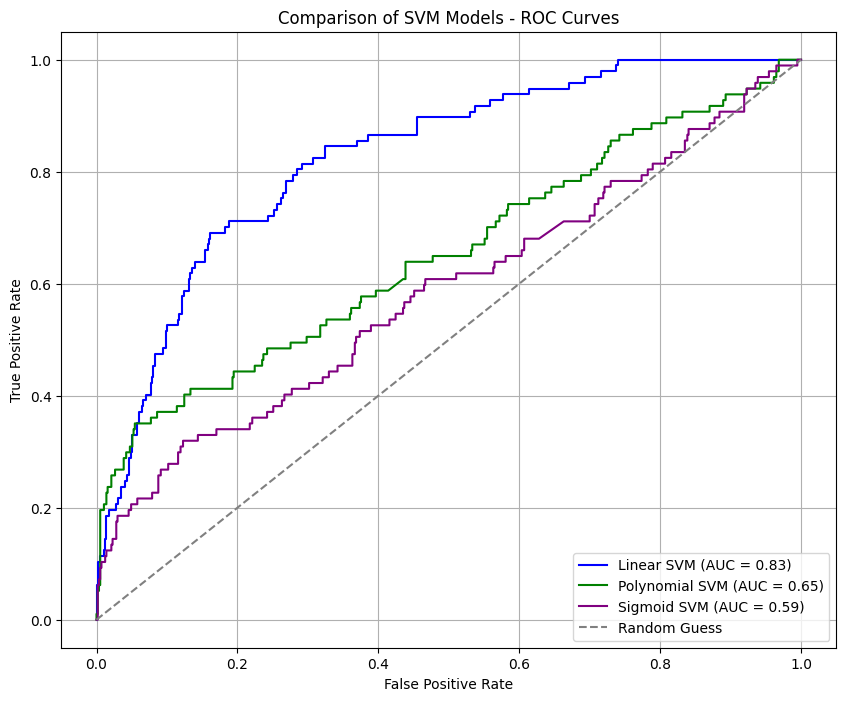

In [ ]:
# Compare ROC curves for all SVM models
plt.figure(figsize=(10, 8))

# Plot ROC curves for each SVM model
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (AUC = {roc_auc_svm_linear:.2f})", color='blue')
plt.plot(fpr_svm_poly, tpr_svm_poly, label=f"Polynomial SVM (AUC = {roc_auc_svm_poly:.2f})", color='green')
plt.plot(fpr_svm_sigmoid, tpr_svm_sigmoid, label=f"Sigmoid SVM (AUC = {roc_auc_svm_sigmoid:.2f})", color='purple')

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Chart details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of SVM Models - ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Evaluation

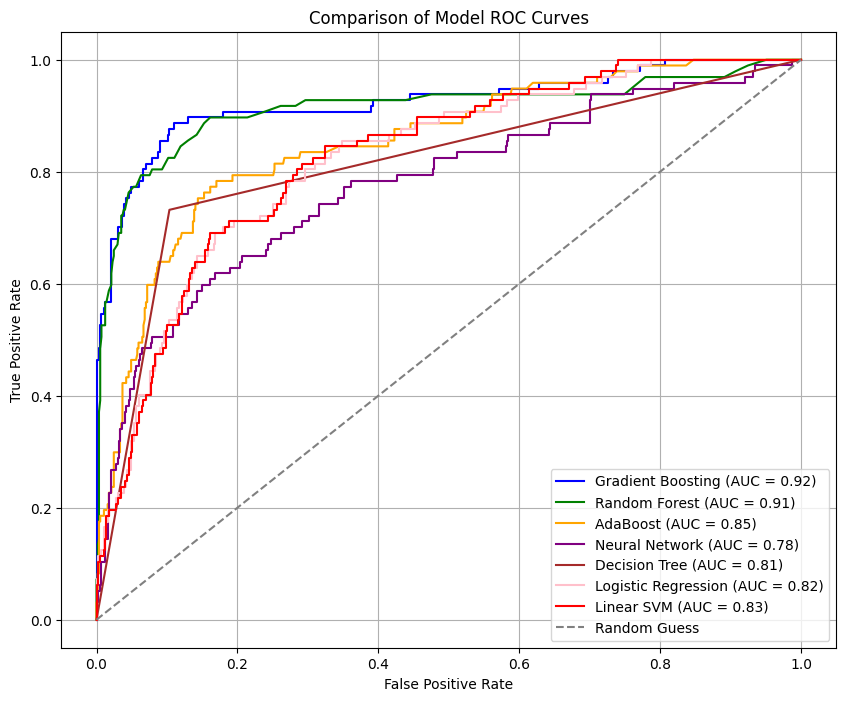

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Add ROC curves for each model
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC = {roc_auc_ada:.2f})", color='orange')
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})", color='purple')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color='brown')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", color='pink')
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (AUC = {roc_auc_svm_linear:.2f})", color='red')

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Chart details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Model ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Gradient Boosting and Random Forest are the top-performing models for this classification task. Their superior AUC values make them ideal candidates for deployment, while simpler models like Logistic Regression and Linear SVM can serve as baseline comparisons. Further improvements can be made by fine-tuning hyperparameters or using feature engineering techniques.

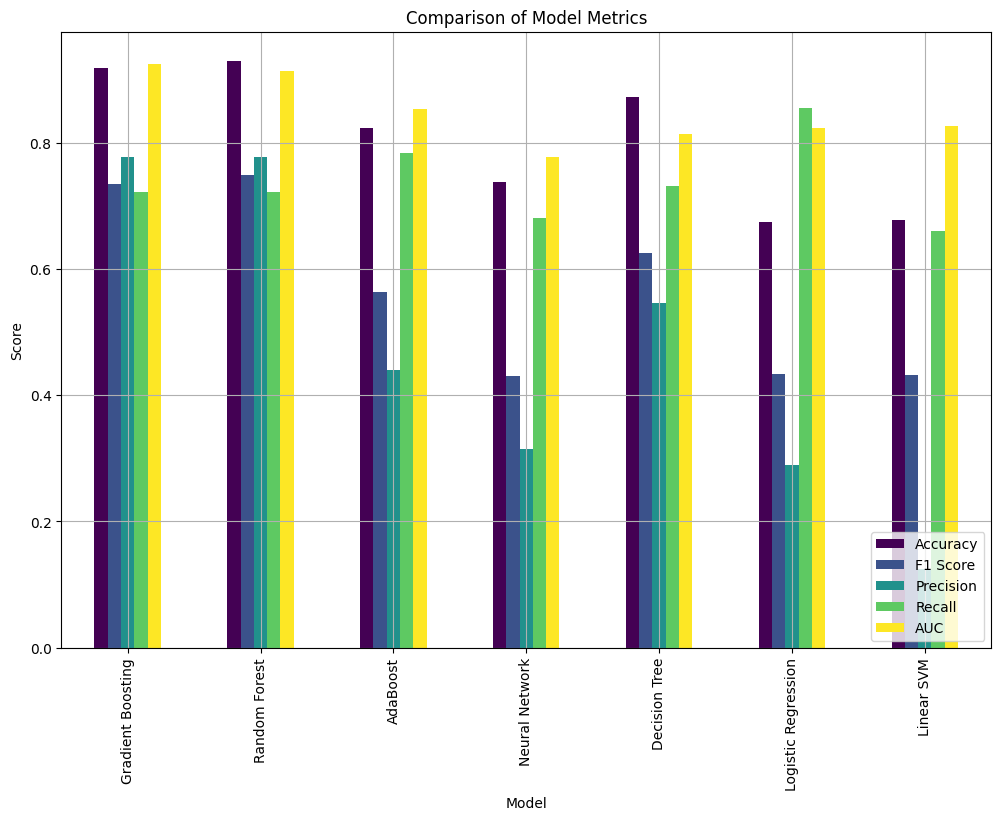

In [ ]:
import pandas as pd

# Collect metrics for all models
metrics = pd.DataFrame({
    "Model": ["Gradient Boosting", "Random Forest", "AdaBoost", "Neural Network", "Decision Tree", "Logistic Regression","Linear SVM"],
    "Accuracy": [accuracy_gb, accuracy_rf, accuracy_ada, accuracy_nn, accuracy_dt, accuracy_lr,accuracy_svm_linear],
    "F1 Score": [f1_gb, f1_rf, f1_ada, f1_nn, f1_dt, f1_lr,f1_svm_linear],
    "Precision": [precision_rf, precision_rf, precision_ada, precision_nn, precision_dt, precision_lr,precision_svm_sigmoid],
    "Recall": [recall_rf, recall_rf, recall_ada, recall_nn, recall_dt, recall_lr,recall_svm_sigmoid ],
    "AUC": [roc_auc_gb, roc_auc_rf, roc_auc_ada, roc_auc_nn, roc_auc_dt, roc_auc_lr, roc_auc_svm_linear]
})

# Plot bar chart for each metric
metrics.set_index("Model").plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1. **Gradient Boosting** and **Random Forest** stand out as the best-performing models, achieving high scores across all three metrics.
2. Models like **AdaBoost** and **Linear SVM** provide good performance but fall short compared to ensemble techniques.
3. **Neural Network** and **Decision Tree** exhibit weaker results, highlighting the need for further tuning or consideration of other modeling techniques.

The comparison shows that ensemble methods such as **Gradient Boosting** and **Random Forest** are more robust and reliable for predicting customer churn.

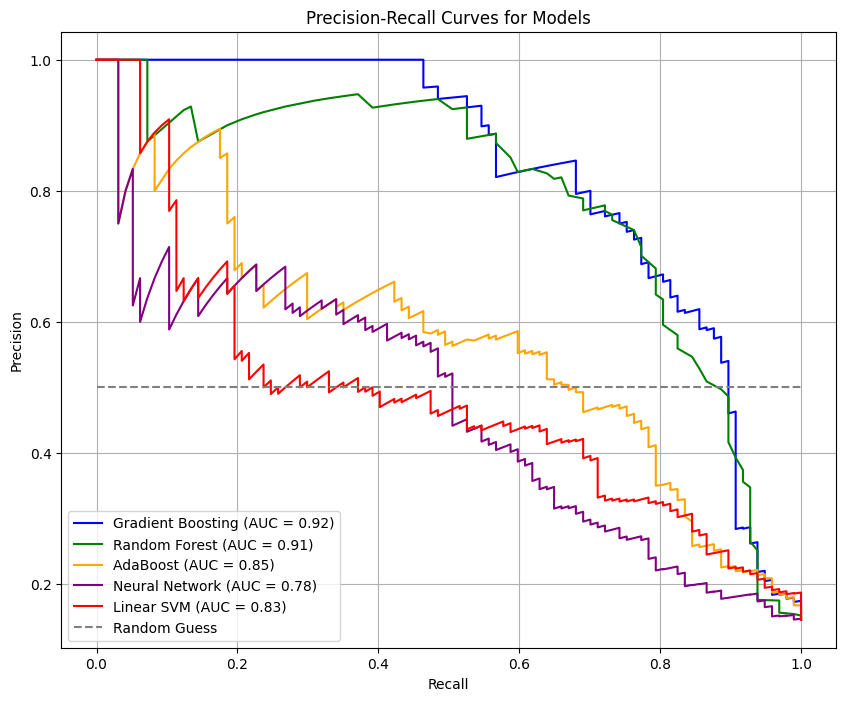

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curves for all models
plt.figure(figsize=(10, 8))

# Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba_gb)
plt.plot(recall_gb, precision_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})", color='blue')

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')

# AdaBoost
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_pred_proba_ada)
plt.plot(recall_ada, precision_ada, label=f"AdaBoost (AUC = {roc_auc_ada:.2f})", color='orange')

# Neural Network
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_proba_nn)
plt.plot(recall_nn, precision_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})", color='purple')

# Linear SVM
precision_svm_linear, recall_svm_linear, _ = precision_recall_curve(y_test, y_pred_proba_svm_linear)
plt.plot(recall_svm_linear, precision_svm_linear, label=f"Linear SVM (AUC = {roc_auc_svm_linear:.2f})", color='red')
# Random guess line
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', label='Random Guess')

# Chart details
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Models')
plt.legend(loc="lower left")
plt.grid()
plt.show()


- **Gradient Boosting** and **Random Forest** are the best-performing models, with high precision across a broad range of recall values.
- **AdaBoost** offers a reasonable balance, while **Neural Network** and **Linear SVM** show weaker performance.
- The **Precision-Recall Curve** emphasizes that ensemble methods (Gradient Boosting and Random Forest) are more reliable for managing class imbalances in churn prediction.

These insights reinforce the findings from the ROC Curve and metric comparisons, further validating **Gradient Boosting** as the top-performing model.

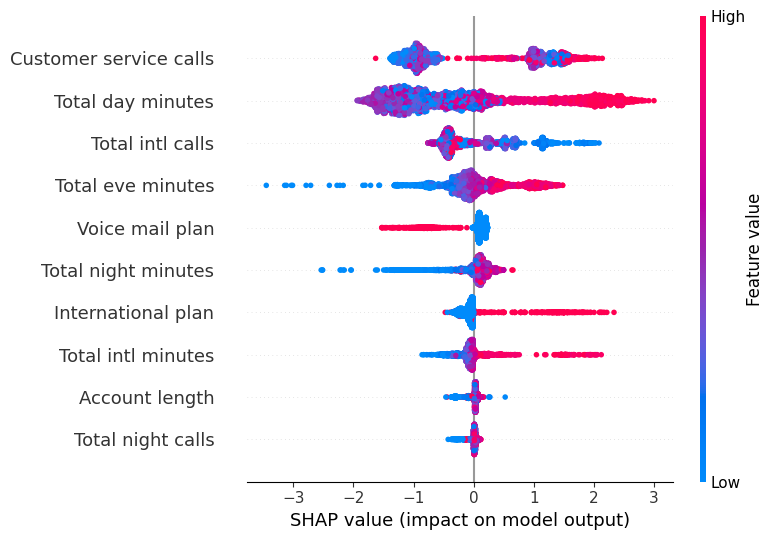

In [ ]:
import shap

# Assuming XGBoost model for SHAP values
explainer = shap.Explainer(gb_model, X_resampled)
shap_values = explainer(X_resampled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_resampled)



- **Customer Service Calls**, **Total Day Minutes**, and **International Plan** are the most important drivers of churn.
- High values of these features consistently push model predictions toward churn, while low values reduce the likelihood of churn.
- This SHAP summary chart allows for a comprehensive understanding of feature behavior and assists in designing strategies for retention, such as addressing frequent customer service calls or monitoring high day-minute usage.

---

This chart complements other visualizations (ROC, Precision-Recall) by explaining the model's decision-making process and providing actionable insights for churn management.

##Survival Time Analysis

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=87401cfa6c8eee8525f971b78a50a4a0fb36ccb7a29fc02323c86b2fa67b3980
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df['Churn'] = df['Churn'].astype(int)  # Convert to binary (0 or 1)
df['Account length'] = df['Account length'].astype(float)  # Ensure numeric type

print(df1[['Account length', 'Churn']].head())


   Account length  Churn
0             128  False
1             107  False
2             137  False
3              84  False
4              75  False


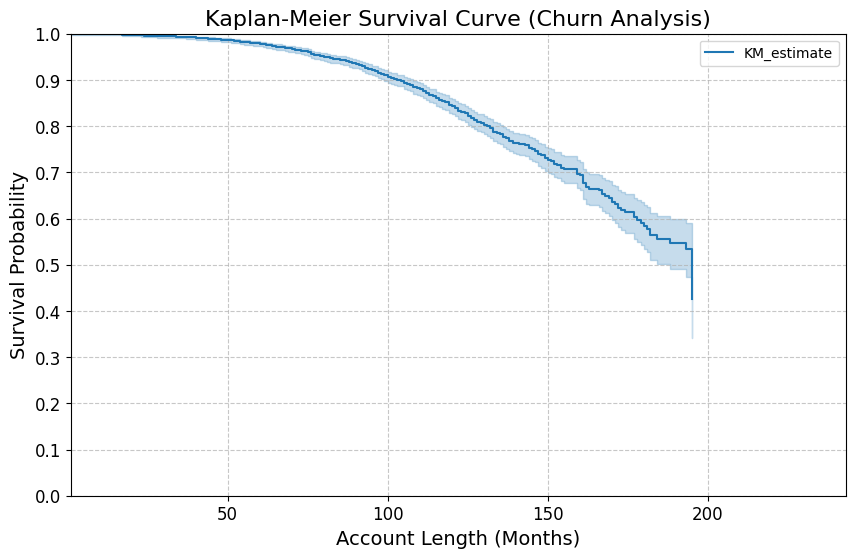

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the model with the time-to-event and event indicator
kmf.fit(durations=df['Account length'], event_observed=df['Churn'])

# Plot the survival function
plt.figure(figsize=(10, 6))  # Augmenter la taille du graphique
kmf.plot_survival_function()

# Personnaliser le graphique
plt.title("Kaplan-Meier Survival Curve (Churn Analysis)", fontsize=16)
plt.xlabel("Account Length (Months)", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Ajouter une grille pour faciliter la lecture
plt.xticks(fontsize=12)  # Ajuster la taille de la police des ticks x
plt.yticks([i / 10 for i in range(0, 11)], fontsize=12)  # Échelle de 0.1 pour l'axe y
plt.ylim(0, 1)  # Garder l'axe y entre 0 et 1
plt.xlim(df1['Account length'].min(), df1['Account length'].max())  # Étendre l'axe x sur toute la gamme
plt.show()



Toward the end (around 180 months), the survival probability becomes very low, showing that nearly all customers have churned.
it is 25% likely that the subscription will last longer than 18 years


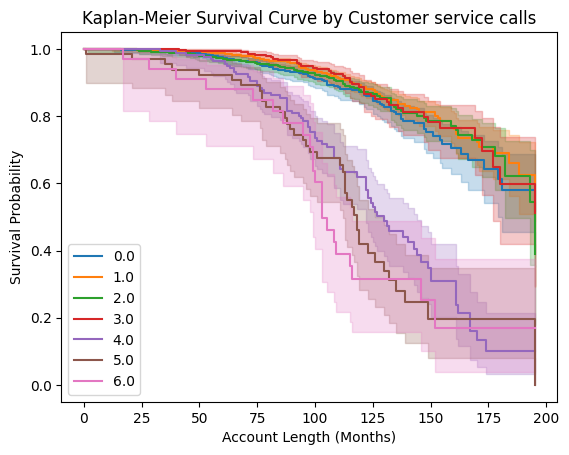

In [ ]:
# Separate groups based on 'Customer service calls

df_kaplan= df.copy()
for label, group in df_kaplan.groupby('Customer service calls'):
    kmf.fit(durations=group['Account length'], event_observed=group['Churn'], label=label)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by Customer service calls")
plt.xlabel("Account Length (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


<ipython-input-89-e7559d66bfa9>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, group in df_kaplan.groupby('Service Call Group'):


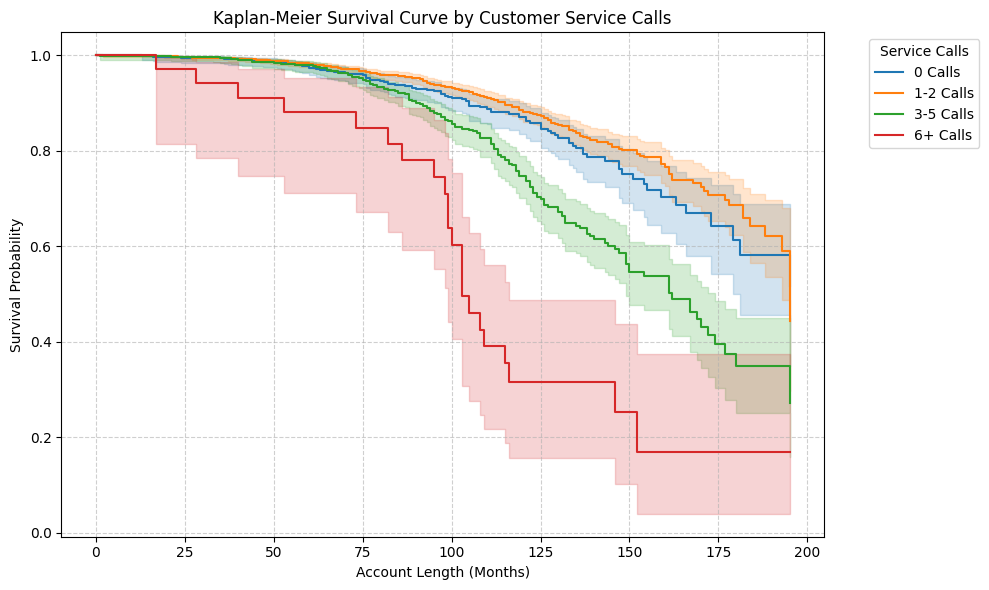

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define simplified categories for Customer Service Calls
df_kaplan['Service Call Group'] = pd.cut(
    df_kaplan['Customer service calls'],
    bins=[-1, 0, 2, 5, 9],  # Define ranges
    labels=["0 Calls", "1-2 Calls", "3-5 Calls", "6+ Calls"]
)

# Create Kaplan-Meier curves for each group
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))  # Increase plot size for clarity

for label, group in df_kaplan.groupby('Service Call Group'):
    kmf.fit(durations=group['Account length'], event_observed=group['Churn'], label=label)
    kmf.plot_survival_function(ci_alpha=0.2)  # Reduce CI opacity

# Enhance plot aesthetics
plt.title("Kaplan-Meier Survival Curve by Customer Service Calls")
plt.xlabel("Account Length (Months)")
plt.ylabel("Survival Probability")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Service Calls", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()

plt.show()


Groups with fewer calls (*e*.g., 0 or 1-2) generally have higher survival probabilities (less churn) over time.
Groups with more calls (e.g., 6+) tend to have lower survival probabilities, indicating higher churn rates.
This suggests that a higher number of customer service calls might be associated with dissatisfaction or unresolved issues, leading to increased churn.


Fewer data points: Groups with fewer customers (e.g., higher service call counts like 8 or 9) contribute fewer events (churns) to the analysis, leading to less precise survival estimates.


Longer time durations: As the x-axis (account length) increases, fewer customers remain in the analysis due to churn or the observation period ending. This reduced sample size increases uncertainty in estimates.

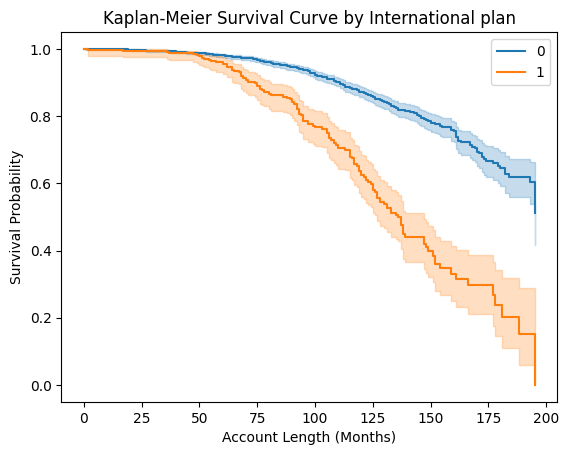

In [ ]:

df_kaplan= df.copy()
for label, group in df_kaplan.groupby('International plan'):
    kmf.fit(durations=group['Account length'], event_observed=group['Churn'], label=label)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by International plan")
plt.xlabel("Account Length (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


From the plot, we can observe that customers with an international plan (orange line) tend to churn more frequently compared to those without an international plan (blue line). This is evident as the survival probability of customers with an international plan drops more sharply over time.

At around 125 months, the survival probability for customers with an international plan is approximately 30%, meaning that 70% of these customers have churned.

On the other hand, customers without an international plan maintain a much higher survival probability of approximately 80%, meaning that only 20% of these customers have churned.

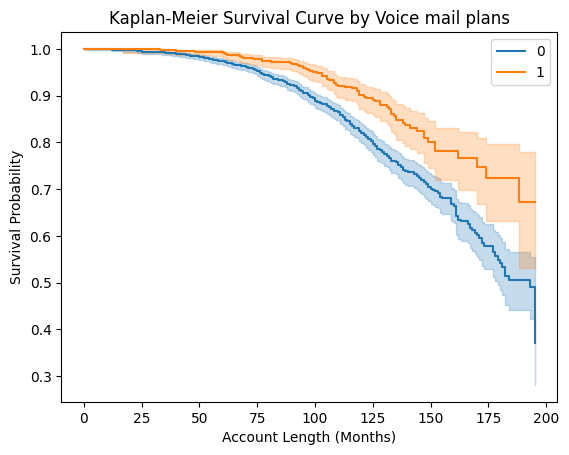

In [ ]:

df_kaplan= df.copy()
for label, group in df_kaplan.groupby('Voice mail plan'):
    kmf.fit(durations=group['Account length'], event_observed=group['Churn'], label=label)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by Voice mail plans")
plt.xlabel("Account Length (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


The Kaplan-Meier survival curve illustrates the relationship between the
presence of a voice mail plan and customer churn over time:

Customers with a voice mail plan (orange curve) exhibit a higher survival probability compared to those without a voice mail plan (blue curve).
At approximately 125 months, the survival probability for customers with a voice mail plan remains around 80%, indicating that only 20% of these customers churned.
Conversely, for customers without a voice mail plan, the survival probability drops to approximately 60%, meaning that 40% of these customers churned.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Compute VIF for each predictor
X = df[['Customer service calls', 'Account length']]  # Replace with your predictors
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



                 Variable       VIF
0                   const  9.033764
1  Customer service calls  1.000020
2          Account length  1.000020


Retention startegy

<ipython-input-93-cca593453e91>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Abs_Importance", y="Feature", palette="viridis")


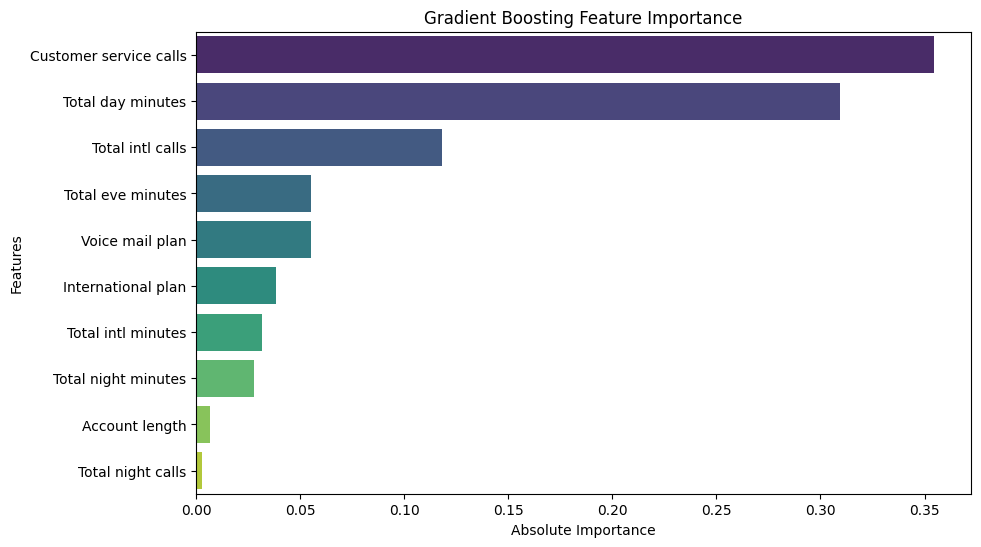

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from gb_model
importance = gb_model.feature_importances_
feature_names = X_selected.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance_df["Abs_Importance"] = feature_importance_df["Importance"].abs()
feature_importance_df = feature_importance_df.sort_values("Abs_Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Abs_Importance", y="Feature", palette="viridis")
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Absolute Importance")
plt.ylabel("Features")
plt.show()


In [ ]:

# Retention Strategy Suggestions
# Top features driving churn
top_features = feature_importance_df["Feature"].head(5).tolist()
print(f"Top features driving churn: {top_features}")

print("\nRetention Strategy:")
for feature in top_features:
    print(f"- {feature}: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]")

Top features driving churn: ['Customer service calls', 'Total day minutes', 'Total intl calls', 'Total eve minutes', 'Voice mail plan']

Retention Strategy:
- Customer service calls: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]
- Total day minutes: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]
- Total intl calls: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]
- Total eve minutes: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]
- Voice mail plan: [Provide targeted strategy based on this feature, e.g., discounts, plan optimization, etc.]


###Retention Strategy


### **1. Customer Service Calls (Top Feature)**
- **Insight**: Customers who make more service calls are likely experiencing dissatisfaction.
- **Retention Strategy**:
   - **Proactive Support**: Identify customers with frequent service calls and assign them to experienced support agents.
   - **First Call Resolution (FCR)**: Improve FCR rates to resolve customer issues on the first call.
   - **Customer Feedback**: Analyze call logs to identify common complaints and address recurring issues.
   - **Personalized Outreach**: Provide discounts or loyalty rewards to dissatisfied customers.

---

### **2. Total Day Minutes**
- **Insight**: High usage during the day indicates heavy reliance on the service, but it may also point to unmet needs or billing dissatisfaction.
- **Retention Strategy**:
   - **Personalized Plans**: Offer tailored day-minute packages to high-usage customers to match their needs.
   - **Usage Monitoring**: Provide alerts when customers approach usage limits to avoid bill shock.
   - **Incentives**: Reward loyal, high-usage customers with bonus minutes or discounts.

---

### **3. Total International Calls**
- **Insight**: Customers making many international calls may face high costs or insufficient plan options.
- **Retention Strategy**:
   - **International Plan Customization**: Offer competitive international call packages with discounts for specific destinations.
   - **Awareness Campaigns**: Educate customers on existing international plans to reduce churn risk.
   - **Loyalty Rewards**: Provide free minutes for long-term international callers.

---

### **4. Total Evening Minutes**
- **Insight**: Significant evening usage suggests customers rely on evening communication.
- **Retention Strategy**:
   - **Evening Plans**: Introduce discounted evening calling plans to retain evening users.
   - **Promotions**: Offer free evening minutes as part of a loyalty program for existing customers.

---

### **5. Voice Mail Plan**
- **Insight**: Voice mail usage may indicate a demand for better accessibility or dissatisfaction with the feature.
- **Retention Strategy**:
   - **Upgrade Voice Mail Services**: Enhance voice mail features (e.g., transcription, storage options).
   - **Customer Communication**: Offer optional voice mail plans for customers who don’t use the feature.

---

### **6. International Plan**
- **Insight**: Dissatisfaction with international plans may lead to churn.
- **Retention Strategy**:
   - **Flexible Plans**: Provide tiered international plans to suit varying usage needs.
   - **Targeted Discounts**: Offer discounts for international plan upgrades to frequent international callers.

---

### **Summary of Strategy**
1. **Proactively Monitor Customers with High Service Calls**:
   - Use predictive analytics to flag at-risk customers based on service calls.
2. **Personalize Plans Based on Usage**:
   - Offer day, evening, and international plans tailored to usage patterns.
3. **Enhance Customer Experience**:
   - Address frequent complaints, improve support quality, and reward customer loyalty.
4. **Communicate Value**:
   - Educate customers on available plans and provide proactive notifications for usage.

